# Wczytanie danych

In [ ]:
seed_value = 42

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Wczytanie danych
data = pd.read_excel('dane_magisterka_fin2.xlsx')
data = data.dropna()  # Usunięcie wierszy z jakimikolwiek NaN

# Konwersja wybranych kolumn na typ 'category'
columns_to_convert = ["Grupa", "Lokalizacja_dobra", "Faza_roku", "Id", "Godzina", "Miesiac",
                      "Faza_Tygodnia", "Plec", "Powyzej1500", "Lokalizacja", "Dyzur",
                      "Rodzaj_wypadku", "Pogoda", "Przyczyna", "Transport", "Cpr", "NACA_4"]
data[columns_to_convert] = data[columns_to_convert].astype('category')

# Definiowanie kolumn, które zostaną zachowane w analizie
columns_to_keep = ['Grupa', 'Dyzur', 'Godzina2', 'Miesiac', 'Liczba_rat', 'Przyczyna', 'Rodzaj_wypadku', 'NACA_4', 'Faza_Tygodnia',
                   'Powyzej1500', 'Cpr', 'Wiek', 'Transport', 'Pogoda', 'Plec', 'Czas_akcji']
df = data[columns_to_keep]
df = df.rename(columns={
    'Lokalizacja_dobra': 'Lokalizacja',
    'Godzina2': 'Godzina'
})
# Podział danych na zbiory treningowy i testowy, stratyfikowany względem kolumny 'NACA_4'
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['NACA_4']), df['NACA_4'], test_size=0.25, stratify=df['NACA_4'], random_state=42)

# Kodowanie one-hot dla kolumn kategorialnych
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Sprawdzenie, czy zbiory treningowy i testowy mają takie same kolumny
# Dodaj brakujące kolumny w zbiorze testowym z wartościami 0
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for c in missing_cols:
    X_test_encoded[c] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]  # Zapewnienie tej samej kolejności kolumn


<ipython-input-4-06bdf985bf5e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_convert] = data[columns_to_convert].astype('category')


<ipython-input-62-339174382d17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NACA_4', y='Czas_akcji', palette='muted')


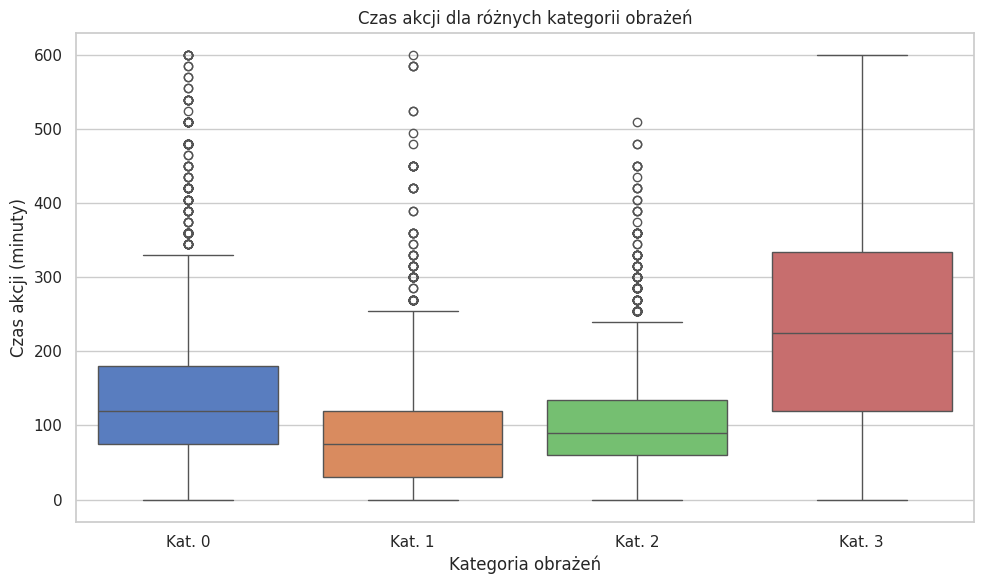

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NACA_4', y='Czas_akcji', palette='muted')

# Dodanie tytułu i etykiet osi
plt.title('Czas akcji dla różnych kategorii obrażeń')
plt.xlabel('Kategoria obrażeń')
plt.ylabel('Czas akcji (minuty)')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Kat. 0', 'Kat. 1', 'Kat. 2', 'Kat. 3'])

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


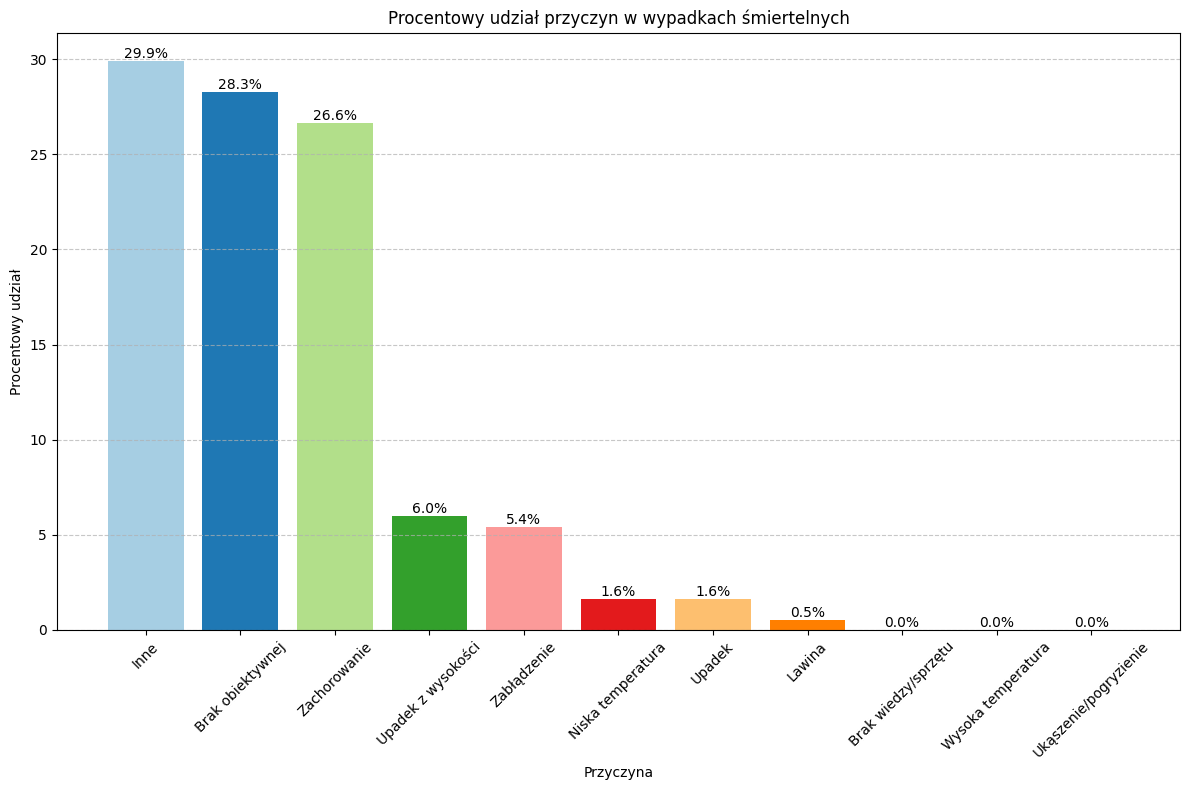

In [ ]:
category_3_data = df[df['NACA_4'] == 3]

# Policz wystąpienia każdej przyczyny
cause_counts = category_3_data['Przyczyna'].value_counts()

# Oblicz procenty
cause_percentages = (cause_counts / cause_counts.sum()) * 100

# Utwórz DataFrame z wynikami
cause_percentages_df = cause_percentages.reset_index()
cause_percentages_df.columns = ['Przyczyna', 'Procentowy udział']

# Polskie nazwy przyczyn
polskie_nazwy = {
    'Brak_obiektywnej': 'Brak obiektywnej',
    'Brak_wiedzy/sprzetu': 'Brak wiedzy/sprzętu',
    'Inne': 'Inne',
    'Lawina': 'Lawina',
    'Niska_temp': 'Niska temperatura',
    'Upadek': 'Upadek',
    'Upadek_wysokosc': 'Upadek z wysokości',
    'Wysoka_temp': 'Wysoka temperatura',
    'Zabladzenie': 'Zabłądzenie',
    'Zachorowanie': 'Zachorowanie',
    'ukoszenie/pogryzienie': 'Ukąszenie/pogryzienie'
}

# Zastąp angielskie nazwy polskimi
cause_percentages_df['Przyczyna'] = cause_percentages_df['Przyczyna'].map(polskie_nazwy)

# Kolory dla wykresu
colors = plt.cm.Paired(range(len(cause_percentages_df)))

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 8))
bars = plt.bar(cause_percentages_df['Przyczyna'], cause_percentages_df['Procentowy udział'], color=colors)

# Dodawanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Przyczyna')
plt.ylabel('Procentowy udział')
plt.title('Procentowy udział przyczyn w wypadkach śmiertelnych')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

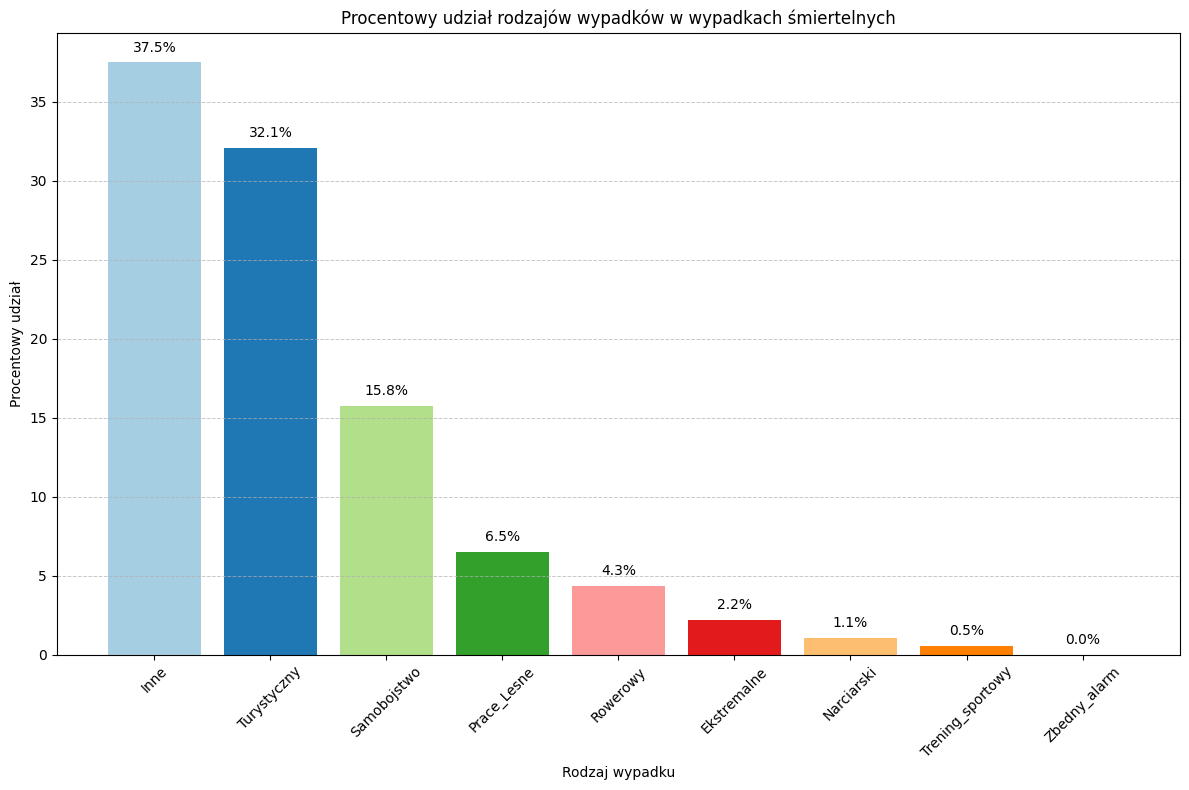

In [ ]:
# Filtrowanie danych dla wypadków śmiertelnych (NACA_4 == 3)
fatal_accidents = df[df['NACA_4'] == 3]

# Grupowanie danych według rodzaju wypadków i liczenie wystąpień
accident_counts = fatal_accidents['Rodzaj_wypadku'].value_counts()

# Obliczanie procentowego udziału
accident_percent = (accident_counts / accident_counts.sum()) * 100

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
bars = plt.bar(accident_percent.index, accident_percent, color=plt.cm.Paired.colors)

# Dodawanie wartości procentowych nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

# Dodawanie tytułów i etykiet
plt.xlabel('Rodzaj wypadku')
plt.ylabel('Procentowy udział')
plt.title('Procentowy udział rodzajów wypadków w wypadkach śmiertelnych')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

<ipython-input-6-ba94348635d1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rodzaj_wypadku', y='Czas_akcji', palette='muted')


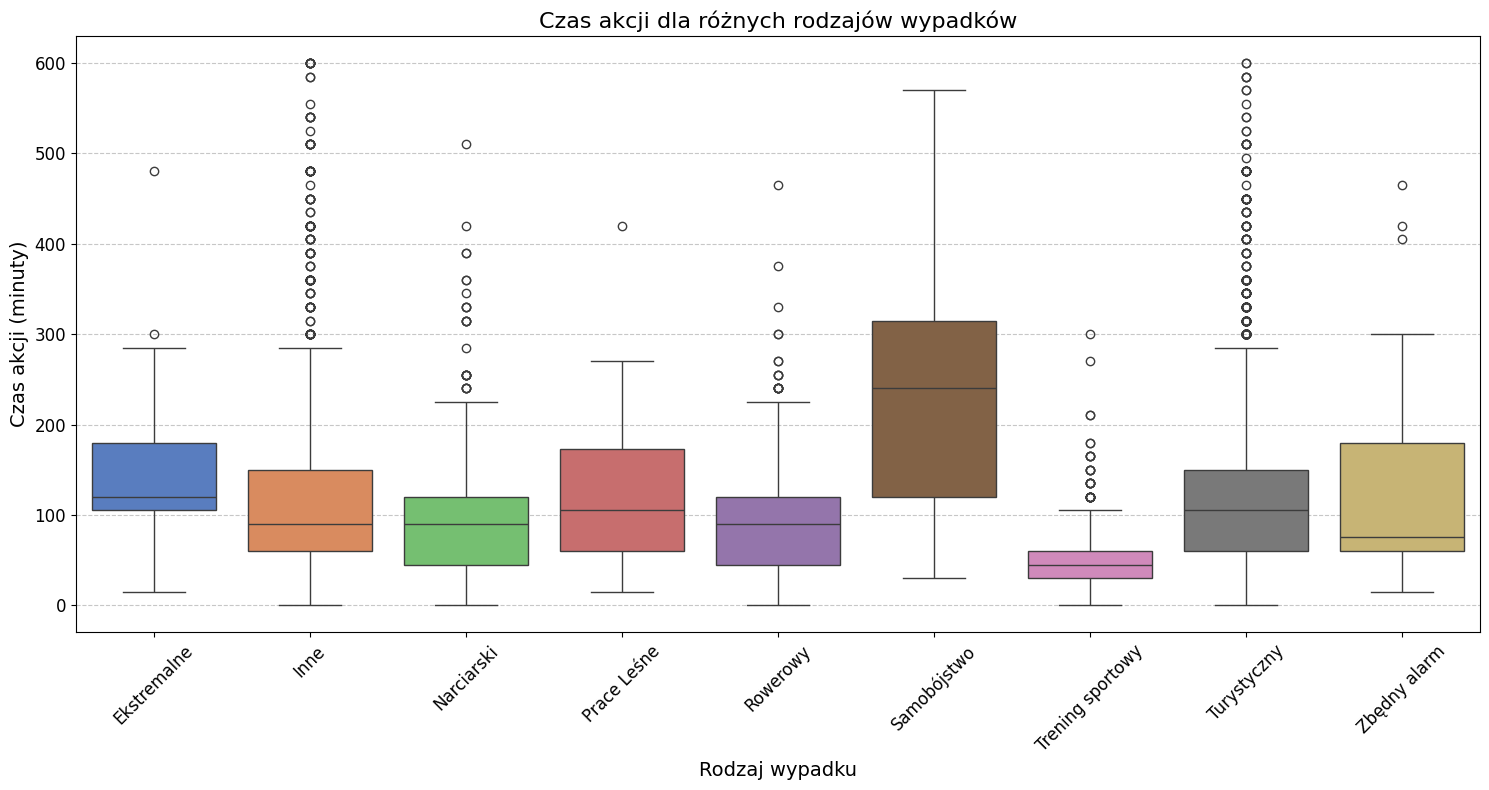

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Przygotowanie danych
df['Rodzaj_wypadku'] = df['Rodzaj_wypadku'].replace({
    'Turystyczny': 'Turystyczny',
    'Inne': 'Inne',
    'Narciarski': 'Narciarski',
    'Zbedny_alarm': 'Zbędny alarm',
    'Samobojstwo': 'Samobójstwo',
    'Ekstremalne': 'Ekstremalne',
    'Rowerowy': 'Rowerowy',
    'Prace_Lesne': 'Prace Leśne',
    'Trening_sportowy': 'Trening sportowy'
})

# Tworzenie boxplotów
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Rodzaj_wypadku', y='Czas_akcji', palette='muted')
plt.title('Czas akcji dla różnych rodzajów wypadków', fontsize=16)
plt.xlabel('Rodzaj wypadku', fontsize=14)
plt.ylabel('Czas akcji (minuty)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dopasowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


Całe dane

In [ ]:
# Definiowanie kolumn, które zostaną zachowane w analizie
columns_to_keep3 = ['Grupa', 'Dyzur', 'Lokalizacja', 'Godzina', 'Miesiac', 'Liczba_rat', 'Przyczyna', 'Rodzaj_wypadku', 'NACA_4', 'Faza_Tygodnia',
                   'Powyzej1500', 'Cpr', 'Wiek', 'Transport', 'Pogoda', 'Plec', 'Czas_akcji']

In [ ]:
dane_cale = data[columns_to_keep3]

In [ ]:
# Podział danych na zbiory treningowy i testowy, stratyfikowany względem kolumny 'NACA_4'
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    dane_cale.drop(columns=['NACA_4']), dane_cale['NACA_4'], test_size=0.25, stratify=df['NACA_4'], random_state=42)

# Kodowanie one-hot dla kolumn kategorialnych
X_train_encoded3 = pd.get_dummies(X_train3)
X_test_encoded3 = pd.get_dummies(X_test3)

## Korelacja

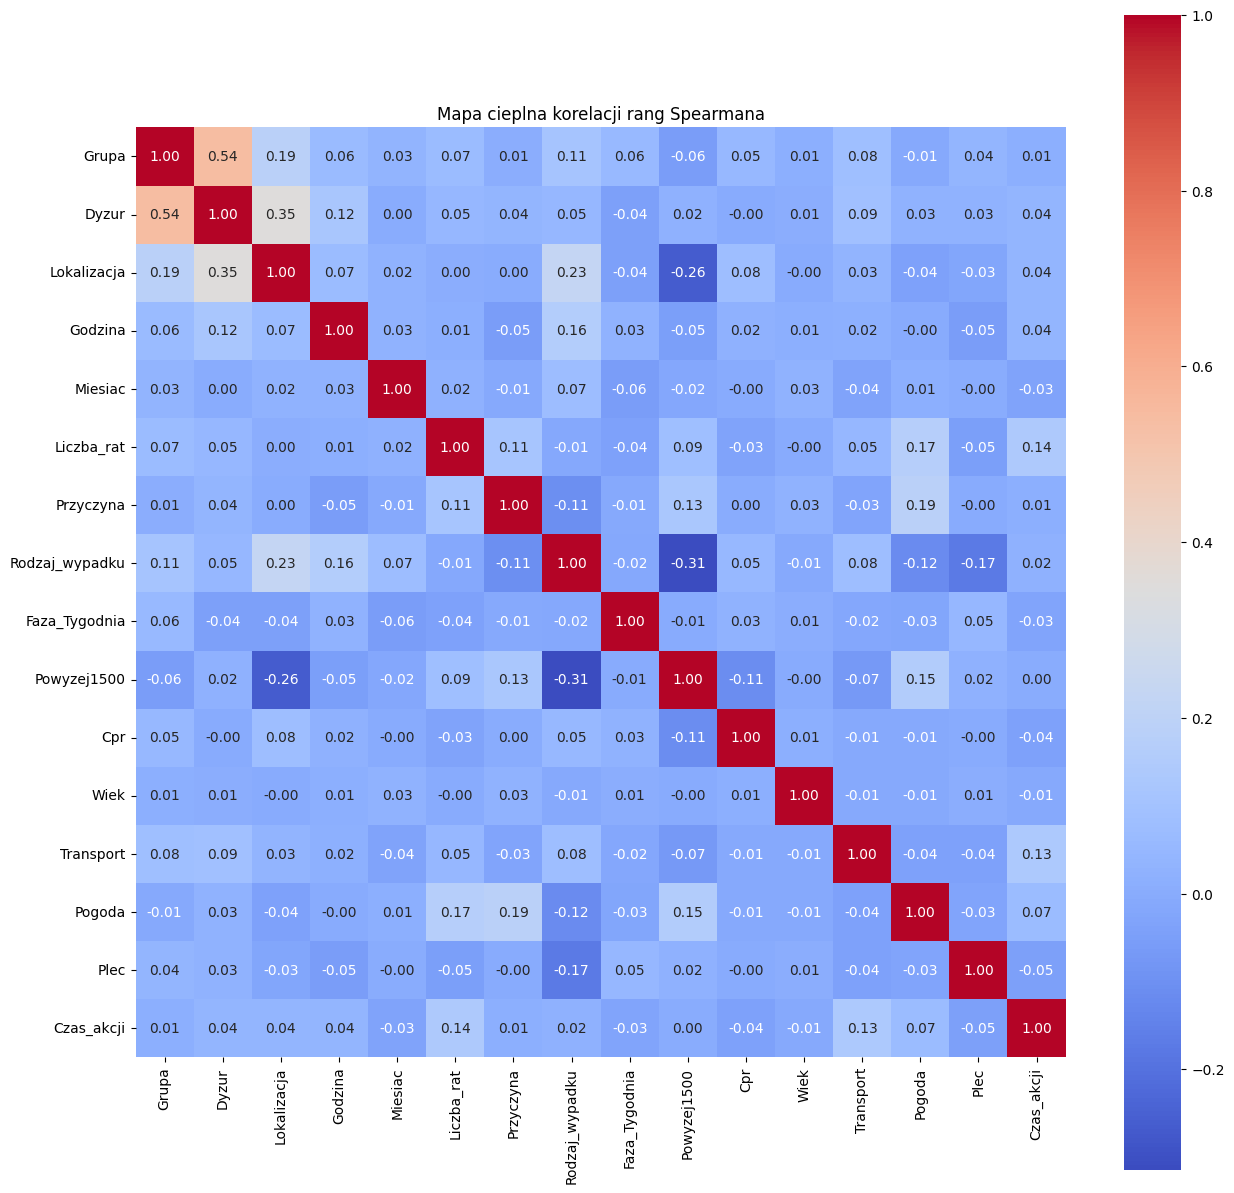

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ustawienie stylu wykresów
# Dla zmiennych kategorycznych obliczamy korelację rang Spearmana
spearman_corr3 = X_train3.apply(lambda x: pd.factorize(x)[0]).corr(method='spearman')

# Tworzymy heatmapę dla macierzy korelacji Spearmana
plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa cieplna korelacji rang Spearmana')
plt.show()

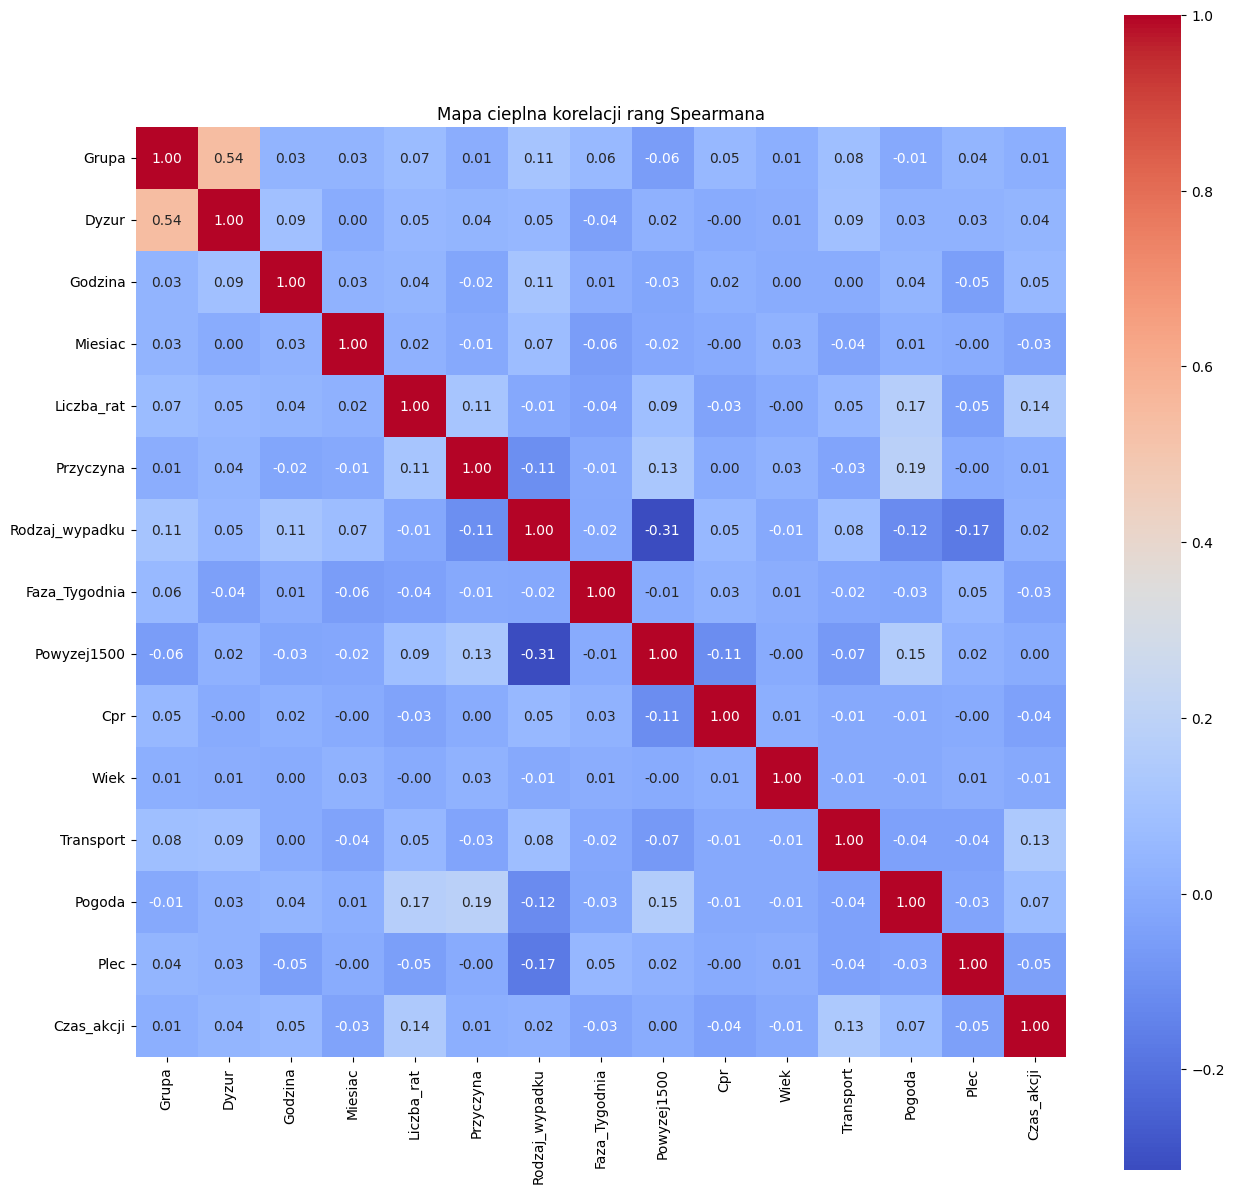

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ustawienie stylu wykresów
# Dla zmiennych kategorycznych obliczamy korelację rang Spearmana
spearman_corr = X_train.apply(lambda x: pd.factorize(x)[0]).corr(method='spearman')

# Tworzymy heatmapę dla macierzy korelacji Spearmana
plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa cieplna korelacji rang Spearmana')
plt.show()

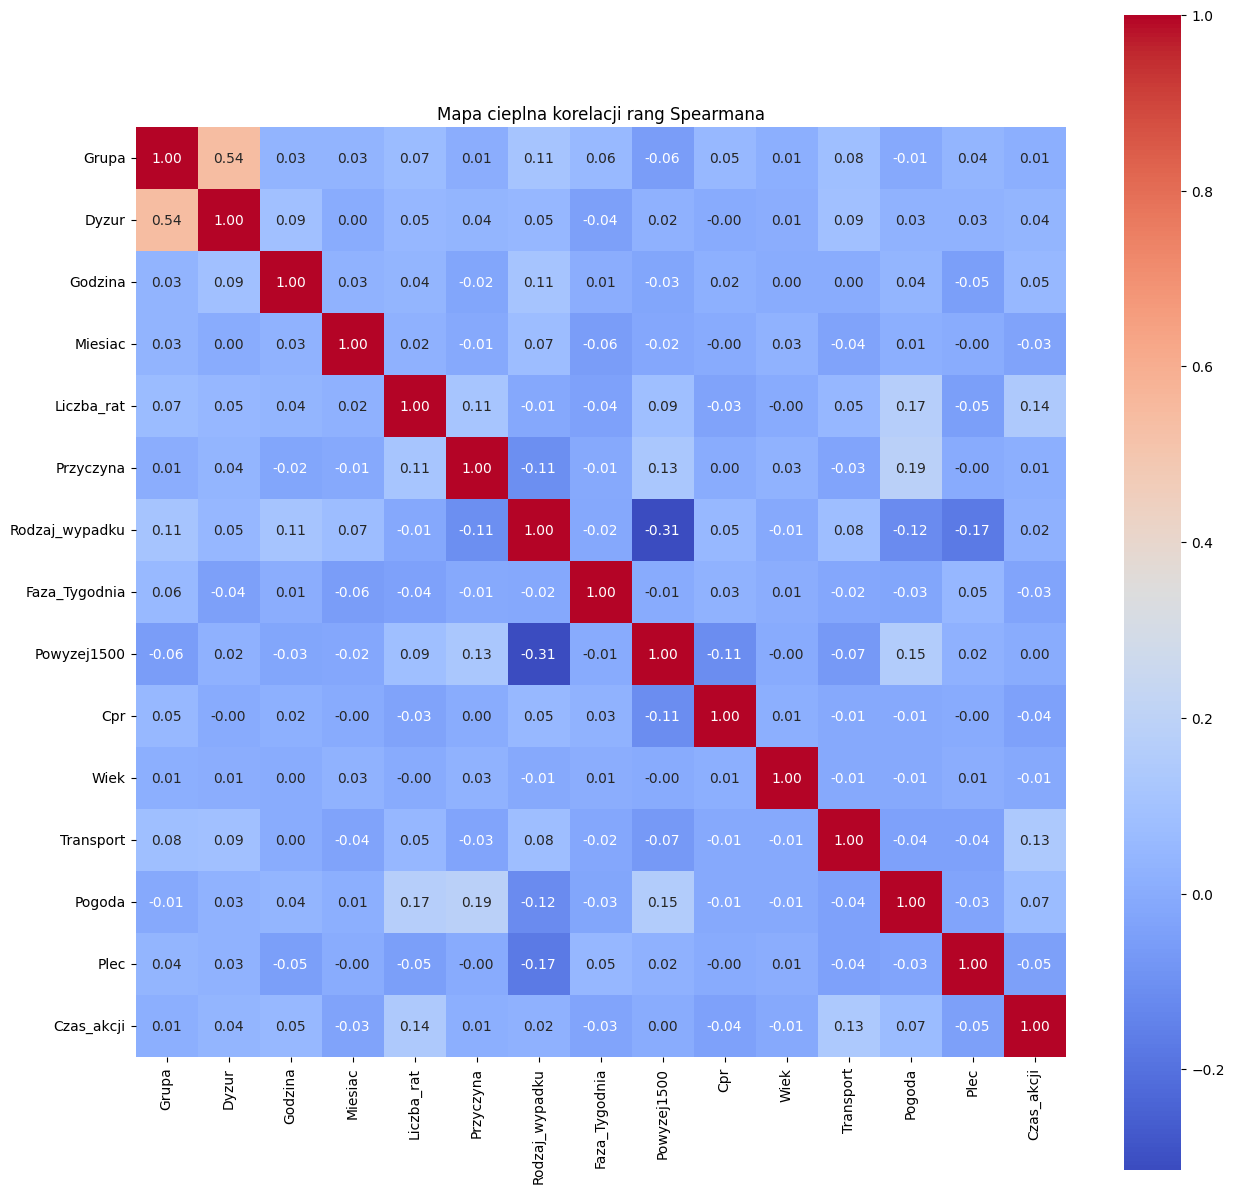

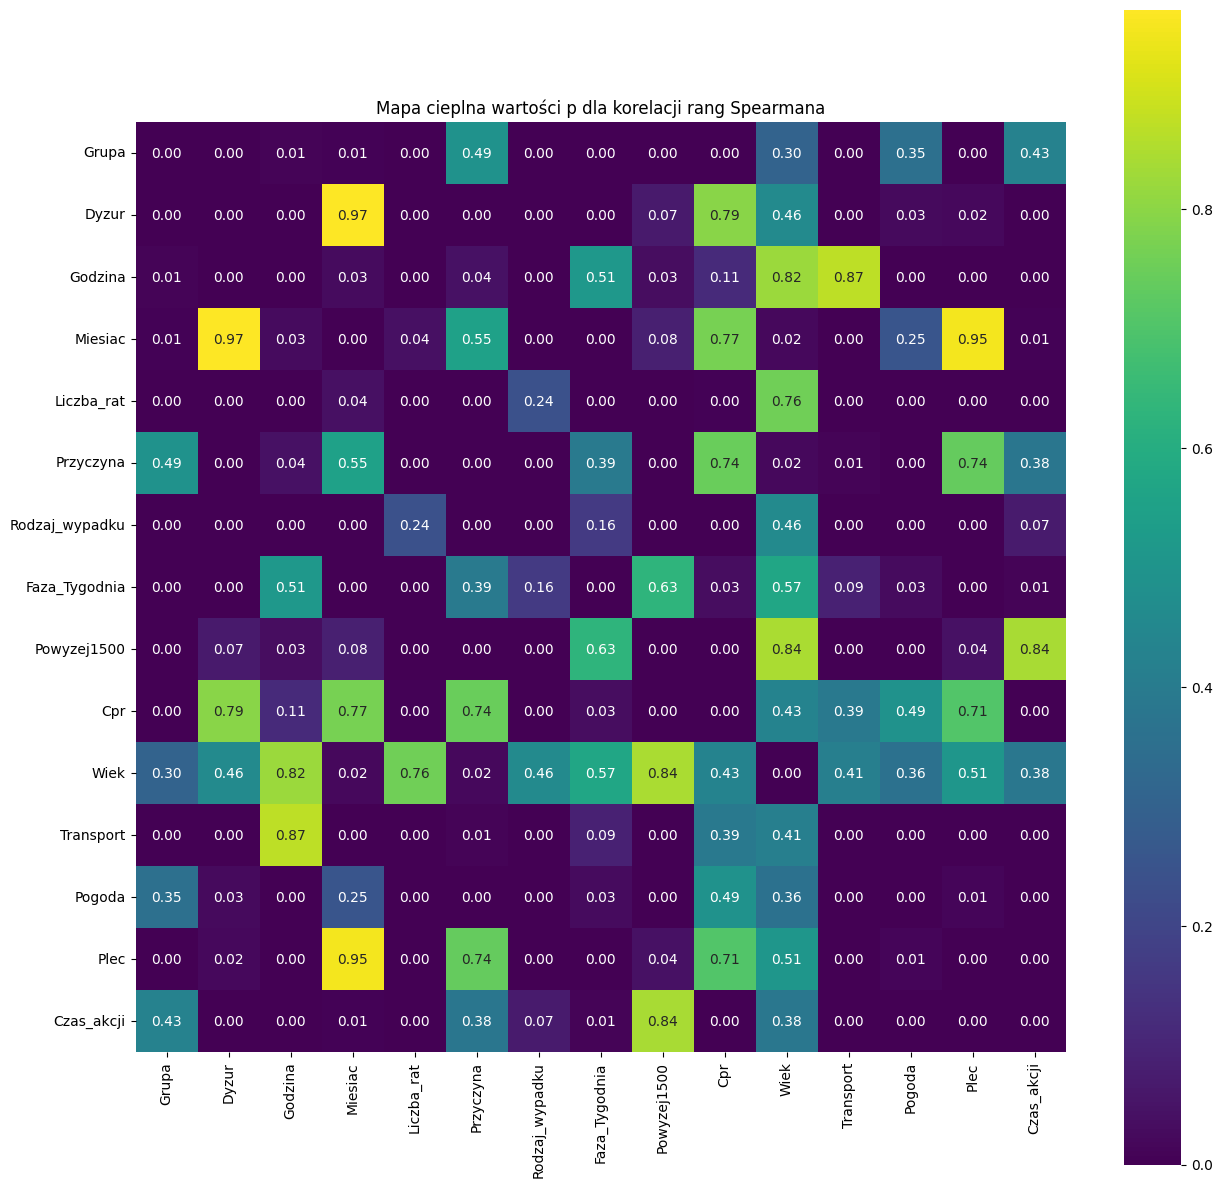

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr



# Ustawienie stylu wykresów
# Dla zmiennych kategorycznych obliczamy korelację rang Spearmana
factorized_X = X_train.apply(lambda x: pd.factorize(x)[0])

# Tworzymy macierz korelacji i macierz wartości p
spearman_corr = factorized_X.corr(method='spearman')
p_values = pd.DataFrame(index=spearman_corr.index, columns=spearman_corr.columns)

# Obliczamy wartości p dla każdej pary zmiennych
for col in factorized_X.columns:
    for row in factorized_X.columns:
        if col != row:
            corr, p_value = spearmanr(factorized_X[col], factorized_X[row])
            p_values.loc[row, col] = p_value
        else:
            p_values.loc[row, col] = 0  # Korelacja ze sobą samym

# Konwertujemy wartości p do typu float
p_values = p_values.astype(float)

# Tworzymy heatmapę dla macierzy korelacji Spearmana
plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa cieplna korelacji rang Spearmana')
plt.show()

# Tworzymy heatmapę dla macierzy wartości p
plt.figure(figsize=(15, 15))
sns.heatmap(p_values, annot=True, fmt=".2f", cmap='plasma', square=True)
plt.title('Mapa cieplna wartości p dla korelacji rang Spearmana')
plt.show()


## RFECV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score, recall_score
from sklearn.model_selection import StratifiedKFold

# Inicjalizacja klasyfikatora Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Inicjalizacja RFECV z accuracy jako metryką
rfecv_accuracy = RFECV(
    estimator=gradient_boosting,
    step=1,
    cv=StratifiedKFold(3),
    scoring='accuracy'  # używamy accuracy jako metryki
)

# Dopasowanie RFECV do danych
rfecv_accuracy.fit(X_train_encoded, y_train)

# Wybranie cech na podstawie accuracy
X_selected_accuracy = rfecv_accuracy.transform(X_train_encoded)





In [ ]:
X_selected_test = rfecv_accuracy.transform(X_test_encoded)

In [ ]:
# Pobranie nazw wszystkich cech
feature_names = X_train_encoded.columns

# Wybrane cechy na podstawie accuracy
selected_features_accuracy = feature_names[rfecv_accuracy.support_]

# Wypisanie nazw wybranych cech
print("Wybrane cechy na podstawie accuracy:")
print(selected_features_accuracy)

# Wyświetlenie rankingu cech
print("\nRanking wszystkich cech:")
for feature, rank in zip(feature_names, rfecv_accuracy.ranking_):
    print(f"{feature}: {rank}")

# Liczba wybranych cech
print("\nLiczba wybranych cech na podstawie accuracy:")
print(len(selected_features_accuracy))

Wybrane cechy na podstawie accuracy:
Index(['Godzina', 'Liczba_rat', 'Wiek', 'Czas_akcji', 'Grupa_Beskidzka',
       'Grupa_Bieszczadzka', 'Grupa_Jurajska', 'Grupa_Krynicka',
       'Grupa_Podhalańska', 'Dyzur_Beskid Śląski', 'Dyzur_CSR Szczyrk - DZIEŃ',
       'Dyzur_Centrala - Jelenia Góra - DZIEŃ- Karpacz',
       'Dyzur_Masyw Babiej Góry', 'Dyzur_Nowy Targ - Długa Polana',
       'Dyzur_Pasmo Pilska', 'Dyzur_RSR Ustrzyki Górne - DZIEŃ',
       'Dyzur_Sokolec', 'Dyzur_Stacja Centralna',
       'Dyzur_Stacja Centralna - Dzień', 'Dyzur_Stacja Karpacz',
       'Dyzur_Stacja Szklarska Poręba', 'Dyzur_Szczawnica',
       'Dyzur_Turbacz Dyżurka', 'Miesiac_1', 'Miesiac_2', 'Miesiac_4',
       'Miesiac_6', 'Miesiac_8', 'Miesiac_11', 'Przyczyna_Brak_obiektywnej',
       'Przyczyna_Brak_wiedzy/sprzetu', 'Przyczyna_Inne',
       'Przyczyna_Niska_temp', 'Przyczyna_Upadek', 'Przyczyna_Upadek_wysokosc',
       'Przyczyna_Zabladzenie', 'Przyczyna_Zachorowanie',
       'Przyczyna_ukoszenie/pogryzie

In [ ]:
import pandas as pd


feature_names = X_train_encoded.columns

# Wybrane cechy na podstawie accuracy
selected_features_accuracy = feature_names[rfecv_accuracy.support_]

# Wypisanie nazw wybranych cech
print("Wybrane cechy na podstawie accuracy:")
print(selected_features_accuracy)

# Przygotowanie listy par (cecha, ranking) i sortowanie jej po rankingu
feature_ranking = sorted(zip(feature_names, rfecv_accuracy.ranking_), key=lambda x: x[1])

# Wyświetlenie rankingu cech od najważniejszej do najmniej ważnej
print("\nRanking wszystkich cech:")
for feature, rank in feature_ranking:
    print(f"{feature}: {rank}")

# Liczba wybranych cech
print("\nLiczba wybranych cech na podstawie accuracy:")
print(len(selected_features_accuracy))


Wybrane cechy na podstawie accuracy:
Index(['Godzina', 'Liczba_rat', 'Wiek', 'Czas_akcji', 'Grupa_Beskidzka',
       'Grupa_Bieszczadzka', 'Grupa_Jurajska', 'Grupa_Krynicka',
       'Grupa_Podhalańska', 'Dyzur_Beskid Śląski', 'Dyzur_CSR Szczyrk - DZIEŃ',
       'Dyzur_Centrala - Jelenia Góra - DZIEŃ- Karpacz',
       'Dyzur_Masyw Babiej Góry', 'Dyzur_Nowy Targ - Długa Polana',
       'Dyzur_Pasmo Pilska', 'Dyzur_RSR Ustrzyki Górne - DZIEŃ',
       'Dyzur_Sokolec', 'Dyzur_Stacja Centralna',
       'Dyzur_Stacja Centralna - Dzień', 'Dyzur_Stacja Karpacz',
       'Dyzur_Stacja Szklarska Poręba', 'Dyzur_Szczawnica',
       'Dyzur_Turbacz Dyżurka', 'Miesiac_1', 'Miesiac_2', 'Miesiac_4',
       'Miesiac_6', 'Miesiac_8', 'Miesiac_11', 'Przyczyna_Brak_obiektywnej',
       'Przyczyna_Brak_wiedzy/sprzetu', 'Przyczyna_Inne',
       'Przyczyna_Niska_temp', 'Przyczyna_Upadek', 'Przyczyna_Upadek_wysokosc',
       'Przyczyna_Zabladzenie', 'Przyczyna_Zachorowanie',
       'Przyczyna_ukoszenie/pogryzie

## Klasyfikatory

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Zastosowanie SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_selected_accuracy, y_train)
print(f"Rozkład klas po SMOTE: {np.bincount(y_res)}")



# Definicja klasyfikatorów z użyciem danych zbalansowanych
classifiers = {
    "Regresja Logistyczna": LogisticRegression(C=100, class_weight= 'balanced',max_iter=10000, solver='lbfgs', random_state=42),
    "Lasy Losowe": RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', min_samples_split=2, n_jobs=-1, random_state=42, bootstrap=True, max_samples=1.0),
    "Drzewa Decyzyjne": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Drzewa Wzmacniane": GradientBoostingClassifier(random_state=42),
    "Klasyfikator Głosujący Twardy": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=1, max_iter=100, solver='liblinear', random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', min_samples_split=2,  n_jobs=-1, random_state=42, bootstrap=True, max_samples=1.0)),
            ('dt', DecisionTreeClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
        ],
        voting='hard'
    ),
    "Klasyfikator Głosujący Miękki": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=100, class_weight= None,max_iter=10000, solver='lbfgs', random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', min_samples_split=2, n_jobs=-1, random_state=42, bootstrap=True, max_samples=1.0)),
        ],
        voting='soft'
    )
}

# Trenowanie klasyfikatorów
for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_selected_test)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_selected_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovo", average="weighted")
        print(f"Metryki dla {name}:\n - Accuracy: {accuracy_score(y_test, y_pred):.2f}\n - AUC: {auc_score:.2f}\n")
    else:
        print(f"Metryki dla {name}:\n - Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

    print(f"Raport klasyfikacji dla {name}:\n{classification_report(y_test, y_pred)}")
    print("#" * 50)


Rozkład klas po SMOTE: [2630 2630 2630 2630]
Metryki dla Regresja Logistyczna:
 - Accuracy: 0.66
 - AUC: 0.86

Raport klasyfikacji dla Regresja Logistyczna:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       666
           1       0.60      0.51      0.55       776
           2       0.68      0.71      0.70       877
           3       0.28      0.43      0.34        46

    accuracy                           0.66      2365
   macro avg       0.57      0.61      0.58      2365
weighted avg       0.66      0.66      0.66      2365

##################################################
Metryki dla Lasy Losowe:
 - Accuracy: 0.69
 - AUC: 0.88

Raport klasyfikacji dla Lasy Losowe:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       666
           1       0.62      0.54      0.58       776
           2       0.71      0.72      0.71       877
           3       0.37      0.24      0.29   

## Istotność cech

<ipython-input-18-98dfef778404>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Istotność', y='Cecha', data=feature_importance_df, palette='viridis', ax=ax)
<ipython-input-18-98dfef778404>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Istotność', y='Cecha', data=feature_importance_df, palette='viridis', ax=ax)
<ipython-input-18-98dfef778404>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Istotność', y='Cecha', data=feature_importance_df, palette='viridis', ax=ax)


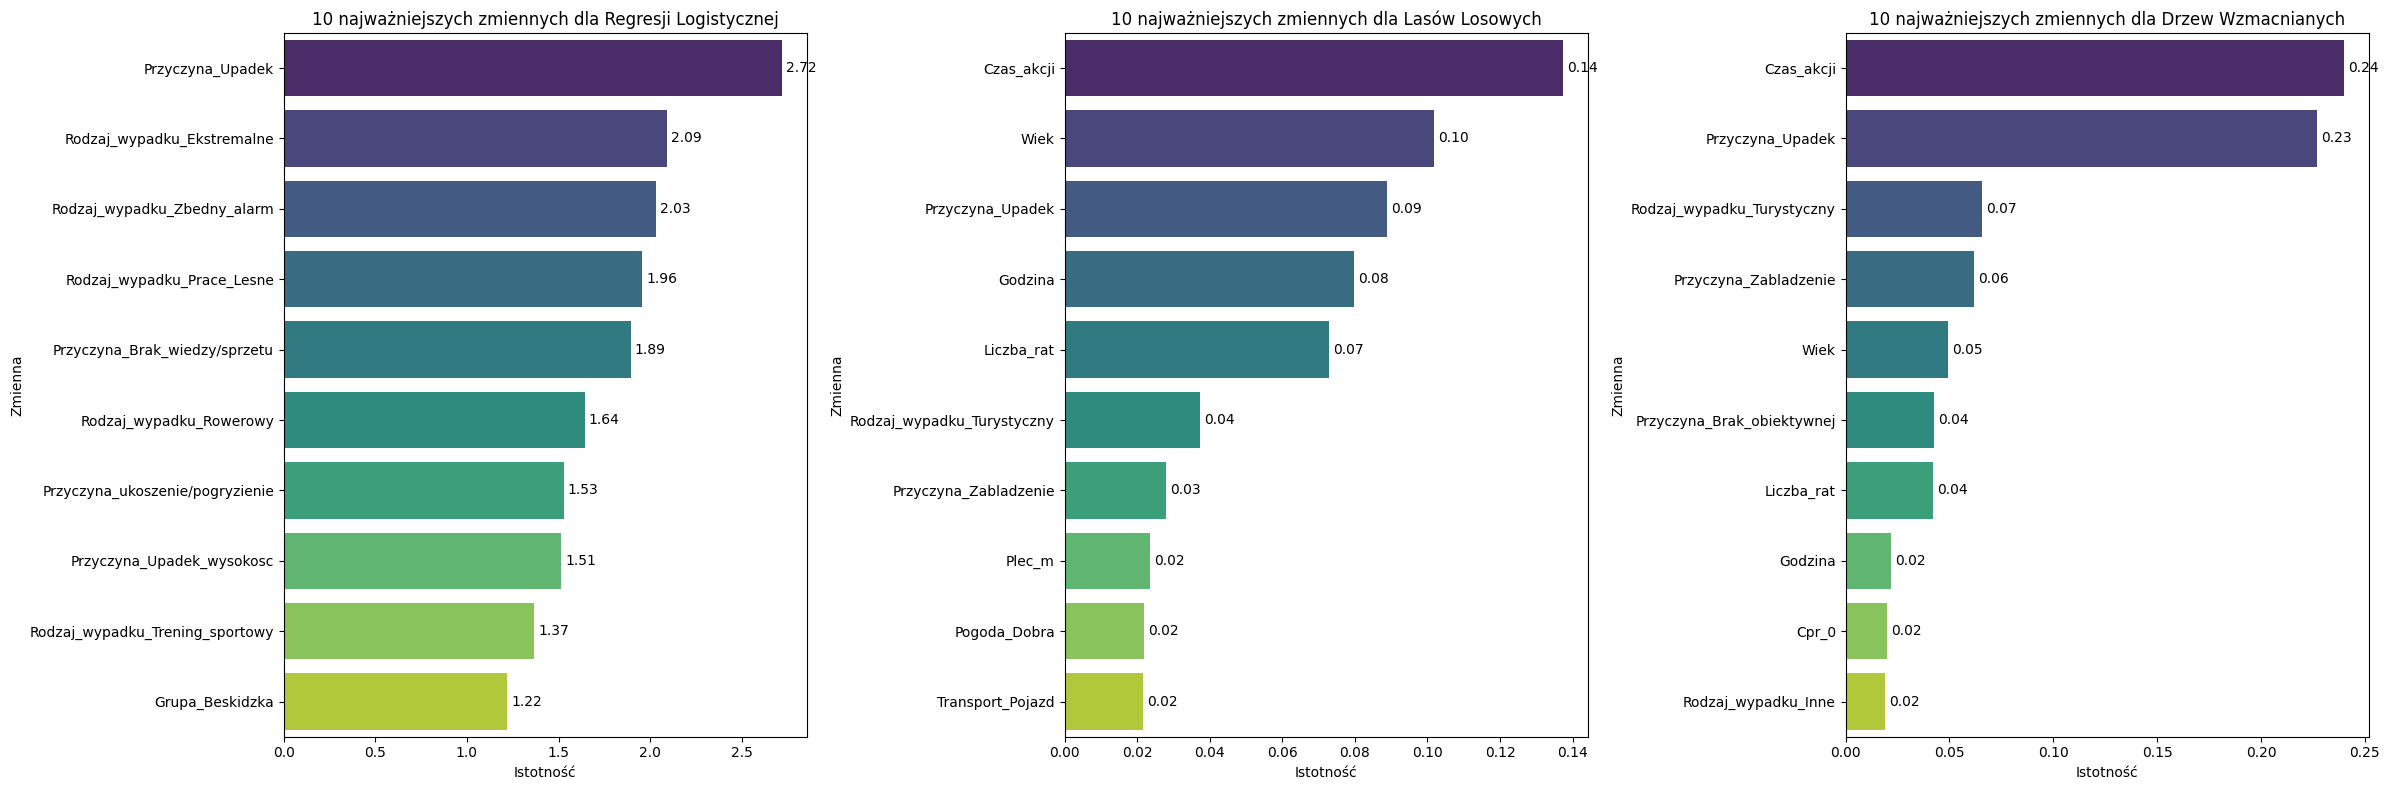

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_importances(classifier, feature_names, classifier_name, ax):
    # Sprawdzenie, czy klasyfikator ma atrybut feature_importances_ lub coef_
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
    elif hasattr(classifier, 'coef_'):
        # Pobierz pierwszy wiersz współczynników dla modeli z pojedynczym zestawem współczynników
        importances = classifier.coef_[0] if len(classifier.coef_.shape) == 1 else np.abs(classifier.coef_).mean(axis=0)
    else:
        print(f"Brak istotności zmiennych lub współczynników dla modelu {classifier_name}")
        return  # Jeśli nie ma ani jednego, ani drugiego, zakończ funkcję

    # Utworzenie DataFrame
    feature_importance_df = pd.DataFrame({'Cecha': feature_names, 'Istotność': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Istotność', ascending=False).head(10)

    # Tworzenie wykresu za pomocą seaborn
    sns.barplot(x='Istotność', y='Cecha', data=feature_importance_df, palette='viridis', ax=ax)
    ax.set_xlabel('Istotność')
    ax.set_ylabel('Zmienna')
    ax.set_title(f'10 najważniejszych zmiennych dla {classifier_name}')

    # Dodanie wartości nad kolumnami
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.2f}',
                    (width, p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(3, 0),
                    textcoords='offset points',
                    fontsize=10,
                    color='black')

# Użyj maski support_ z RFECV, aby uzyskać nazwy wybranych cech
selected_feature_names = X_train_encoded.columns[rfecv_accuracy.support_]

# Tworzenie figure i osi dla subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Założenie, że classifiers jest słownikiem zawierającym modele
plot_feature_importances(classifiers['Regresja Logistyczna'], selected_feature_names, 'Regresji Logistycznej', axs[0])
plot_feature_importances(classifiers['Lasy Losowe'], selected_feature_names, 'Lasów Losowych', axs[1])
plot_feature_importances(classifiers['Drzewa Wzmacniane'], selected_feature_names, 'Drzew Wzmacnianych', axs[2])

plt.tight_layout()
plt.show()


<ipython-input-19-4896cc3f17ce>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Original Feature', data=feature_importance_df, palette='viridis', ax=ax)
<ipython-input-19-4896cc3f17ce>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Original Feature', data=feature_importance_df, palette='viridis', ax=ax)
<ipython-input-19-4896cc3f17ce>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Original Feature', data=feature_importance_df, palette='viridis', ax

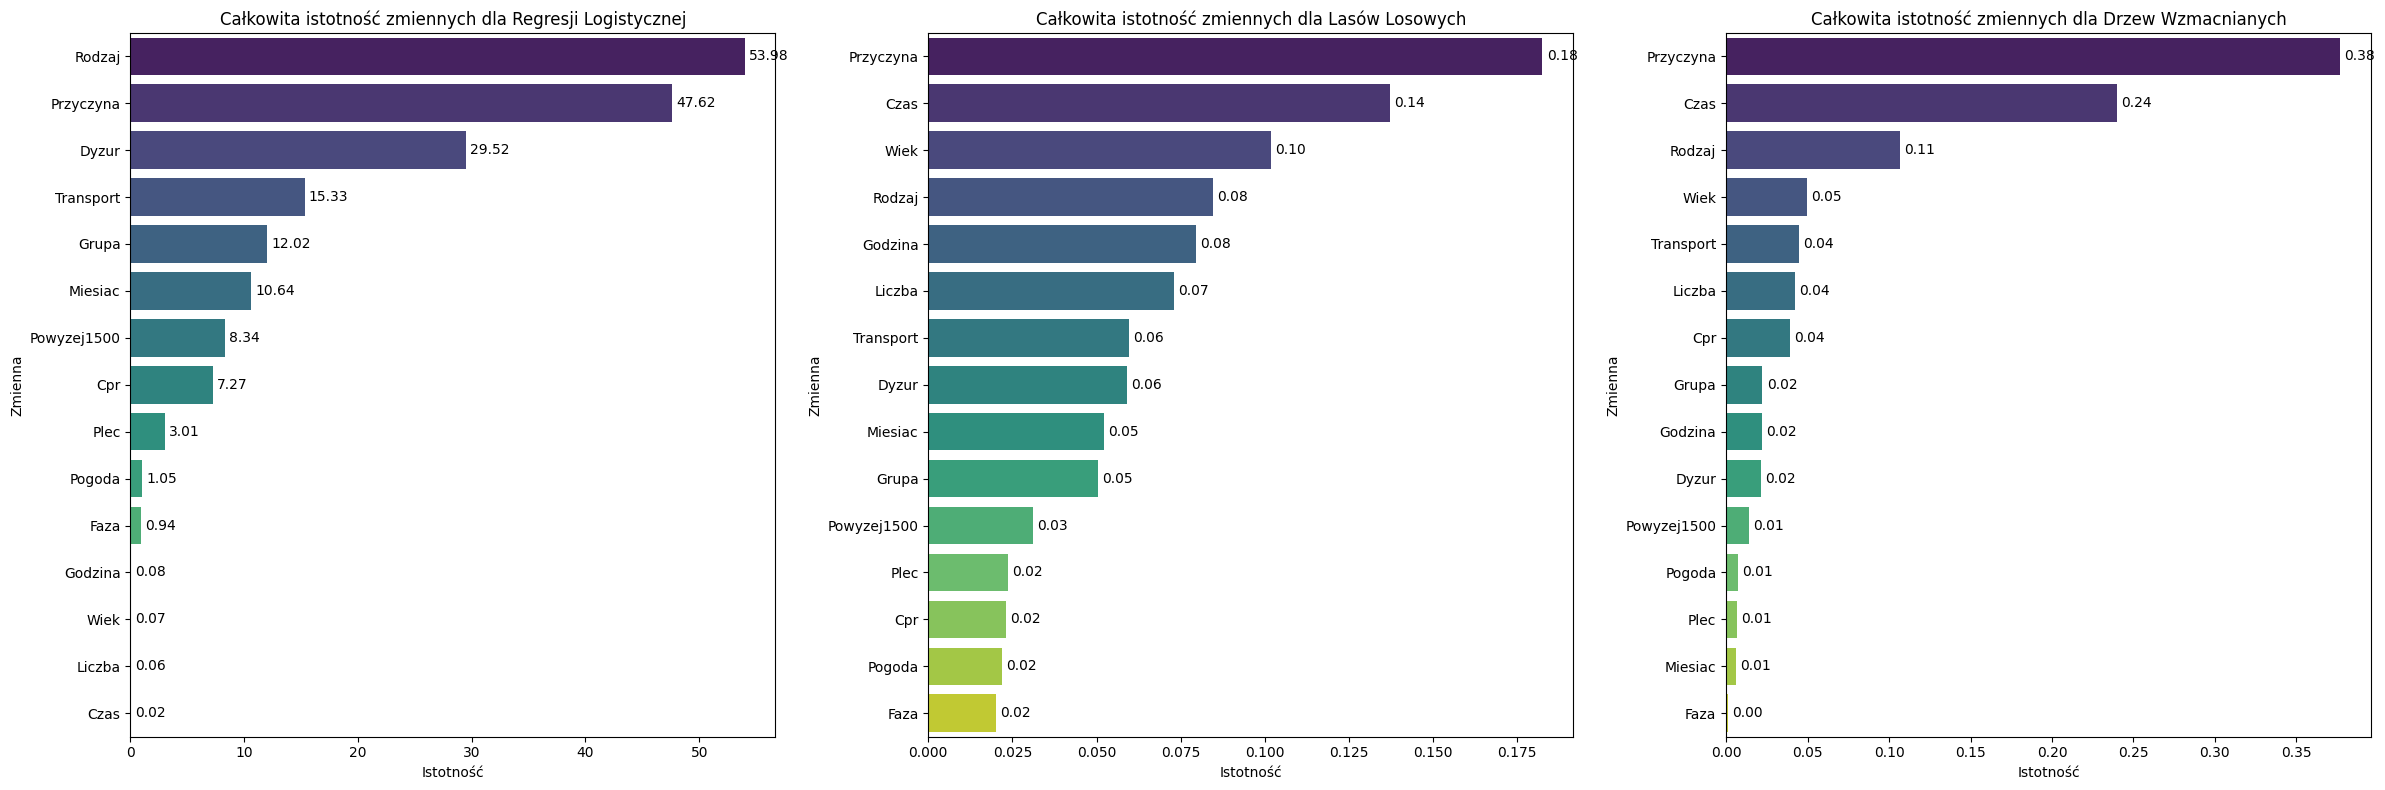

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_importances(classifier, feature_names, classifier_name, ax):
    # Sprawdzenie, czy klasyfikator ma atrybut feature_importances_ lub coef_
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
    elif hasattr(classifier, 'coef_'):
        importances = np.sum(np.abs(classifier.coef_), axis=0)
    else:
        print(f"{classifier_name} nie obsługuje istotności zmiennych ani współczynników.")
        return

    # Utworzenie DataFrame
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df['Original Feature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
    feature_importance_df = feature_importance_df.groupby('Original Feature')['Importance'].sum().reset_index()
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sortowanie malejąco

    # Tworzenie wykresu za pomocą seaborn
    barplot = sns.barplot(x='Importance', y='Original Feature', data=feature_importance_df, palette='viridis', ax=ax)
    ax.set_xlabel('Istotność')
    ax.set_ylabel('Zmienna')
    ax.set_title(f'Całkowita istotność zmiennych dla {classifier_name}')

    # Dodanie wartości nad kolumnami
    for p in barplot.patches:
        width = p.get_width()
        barplot.annotate(f'{width:.2f}',
                         (width, p.get_y() + p.get_height() / 2),
                         ha='left', va='center',
                         xytext=(3, 0),
                         textcoords='offset points',
                         fontsize=10,
                         color='black')

# Użyj maski support_ z RFECV, aby uzyskać nazwy wybranych cech
selected_feature_names = X_train_encoded.columns[rfecv_accuracy.support_]

# Tworzenie figure i osi dla subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Założenie, że classifiers jest słownikiem zawierającym modele
plot_feature_importances(classifiers['Regresja Logistyczna'], selected_feature_names, 'Regresji Logistycznej', axs[0])
plot_feature_importances(classifiers['Lasy Losowe'], selected_feature_names, 'Lasów Losowych', axs[1])
plot_feature_importances(classifiers['Drzewa Wzmacniane'], selected_feature_names, 'Drzew Wzmacnianych', axs[2])

plt.tight_layout()
plt.show()


## Wykresy Accuracy i AUC

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score

# Słownik do przechowywania wyników
results = {
    "Classifier": [],
    "Accuracy": [],
    "AUC": [],
    "Recall_Class_0": [],
    "Recall_Class_1": [],
    "Recall_Class_2": [],
    "Recall_Class_3": [],
    "F1_Class_0": [],
    "F1_Class_1": [],
    "F1_Class_2": [],
    "F1_Class_3": [],
    "Precision_Class_0": [],
    "Precision_Class_1": [],
    "Precision_Class_2": [],
    "Precision_Class_3": []
}

# Trenowanie klasyfikatorów i zbieranie danych
for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_selected_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results["Classifier"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_selected_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovo", average="weighted")
        results["AUC"].append(auc_score)
    else:
        results["AUC"].append(None)
    results["Recall_Class_0"].append(report['0']['recall'])
    results["Recall_Class_1"].append(report['1']['recall'])
    results["Recall_Class_2"].append(report['2']['recall'])
    results["Recall_Class_3"].append(report['3']['recall'])
    results["F1_Class_0"].append(report['0']['f1-score'])
    results["F1_Class_1"].append(report['1']['f1-score'])
    results["F1_Class_2"].append(report['2']['f1-score'])
    results["F1_Class_3"].append(report['3']['f1-score'])
    results["Precision_Class_0"].append(report['0']['precision'])
    results["Precision_Class_1"].append(report['1']['precision'])
    results["Precision_Class_2"].append(report['2']['precision'])
    results["Precision_Class_3"].append(report['3']['precision'])

# Konwersja wyników na DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                      Classifier  Accuracy       AUC  Recall_Class_0  \
0           Regresja Logistyczna  0.657082  0.858056        0.770270   
1                    Lasy Losowe  0.686681  0.875112        0.843844   
2               Drzewa Decyzyjne  0.580550  0.671377        0.704204   
3                            SVM  0.423679  0.705774        0.165165   
4              Drzewa Wzmacniane  0.671882  0.873372        0.801802   
5  Klasyfikator Głosujący Twardy  0.675264       NaN        0.857357   
6  Klasyfikator Głosujący Miękki  0.675264  0.879210        0.806306   

   Recall_Class_1  Recall_Class_2  Recall_Class_3  F1_Class_0  F1_Class_1  \
0        0.512887        0.710376        0.434783    0.743478    0.552011   
1        0.541237        0.719498        0.239130    0.787115    0.577717   
2        0.490979        0.587229        0.173913    0.683673    0.487836   
3        0.423969        0.603193        0.739130    0.251142    0.466006   
4        0.534794        0.705815     

<ipython-input-21-27f926877d90>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Pobranie mapy kolorów 'viridis'
<ipython-input-21-27f926877d90>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  accuracy_plot = sns.barplot(x="Classifier", y="Accuracy", data=results_df, palette=colors)


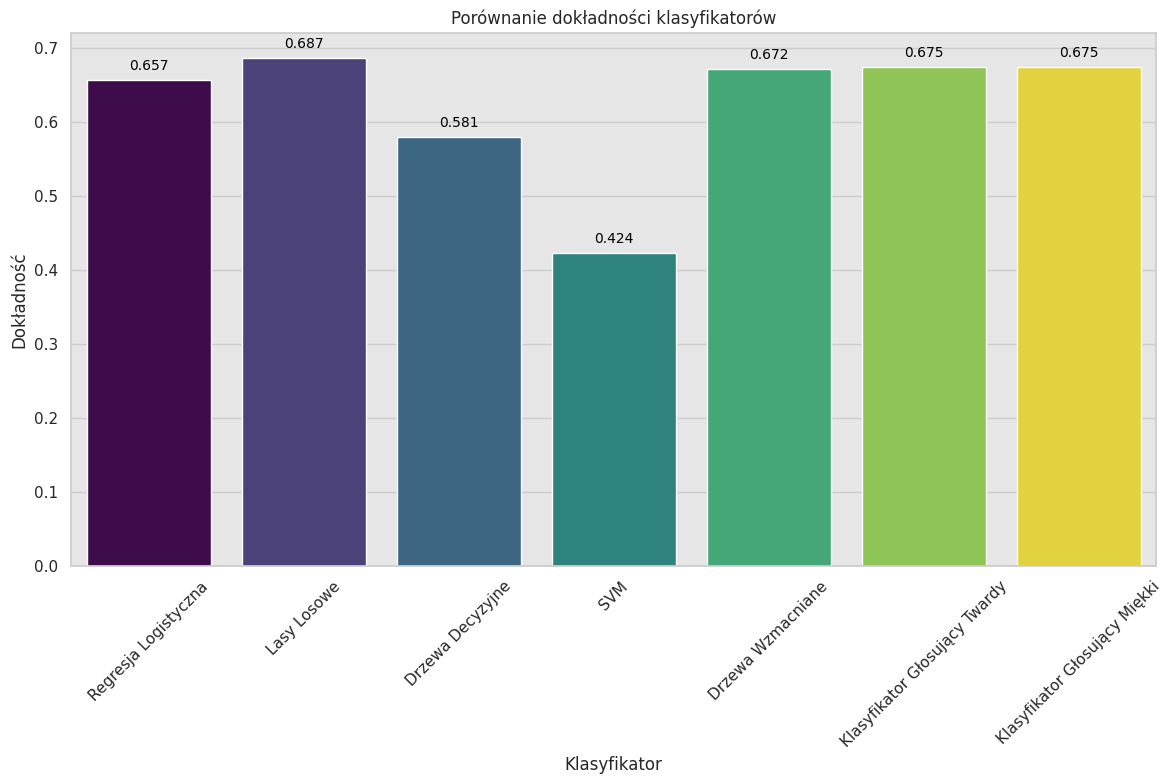

<ipython-input-21-27f926877d90>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  auc_plot = sns.barplot(x="Classifier", y="AUC", data=results_df, palette=colors)


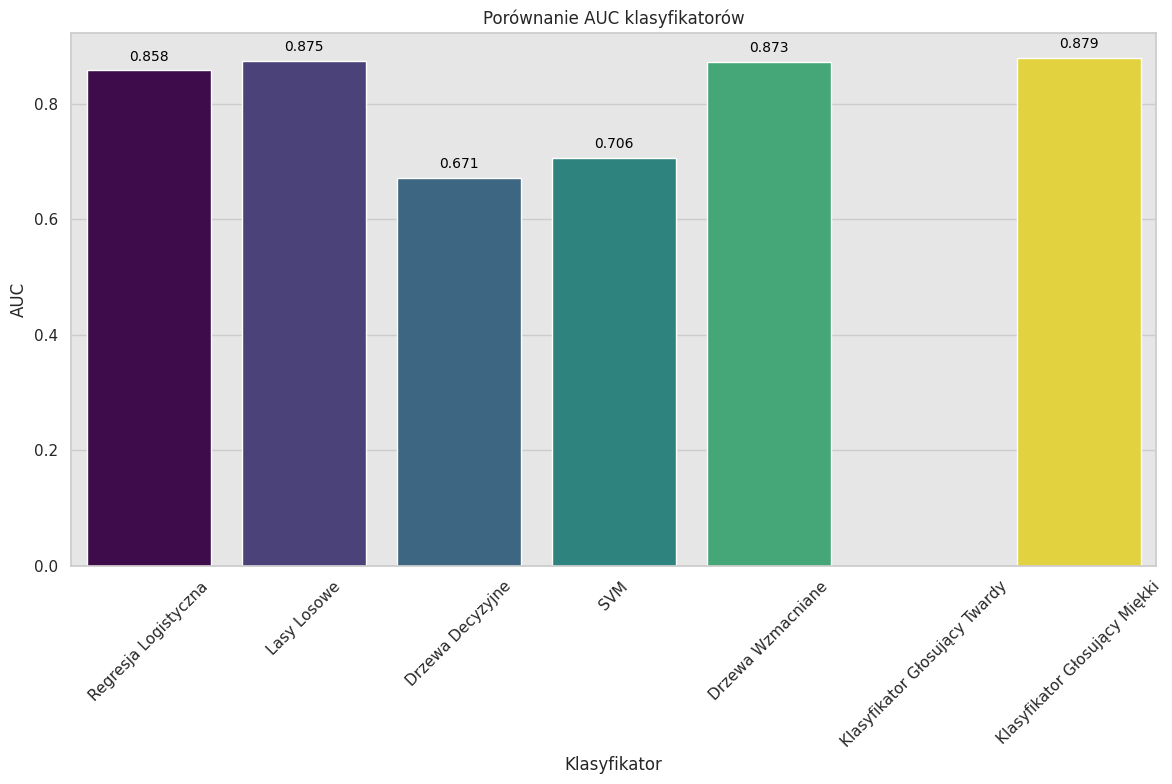

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Ustawienie stylu wykresów
sns.set(style="whitegrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})

# Funkcja pomocnicza do formatowania etykiet
def format_float(value):
    return f"{value:.3f}"


cmap = cm.get_cmap('viridis')

# Wygenerowanie listy kolorów z mapy kolorów
colors = [cmap(i) for i in np.linspace(0, 1, len(results_df['Classifier'].unique()))]

# Wykres Accuracy dla wszystkich klasyfikatorów
plt.figure(figsize=(12, 8))
accuracy_plot = sns.barplot(x="Classifier", y="Accuracy", data=results_df, palette=colors)
accuracy_plot.set_title('Porównanie dokładności klasyfikatorów')
accuracy_plot.set_xlabel('Klasyfikator')
accuracy_plot.set_ylabel('Dokładność')
# Dodawanie etykiet z wartościami
for p in accuracy_plot.patches:
    accuracy_plot.annotate(format_float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                           textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres AUC dla wszystkich klasyfikatorów
plt.figure(figsize=(12, 8))
auc_plot = sns.barplot(x="Classifier", y="AUC", data=results_df, palette=colors)
auc_plot.set_title('Porównanie AUC klasyfikatorów')
auc_plot.set_xlabel('Klasyfikator')
auc_plot.set_ylabel('AUC')
# Dodawanie etykiet z wartościami
for p in auc_plot.patches:
    if p.get_height() is not None:  # Sprawdzenie, czy wartość AUC istnieje
        auc_plot.annotate(format_float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                           textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Wykresy Recall i F1

<ipython-input-22-57e55a3d9f55>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  recall_plot = sns.barplot(x="Classifier", y="Recall_Class_3", data=results_df, palette=colors)


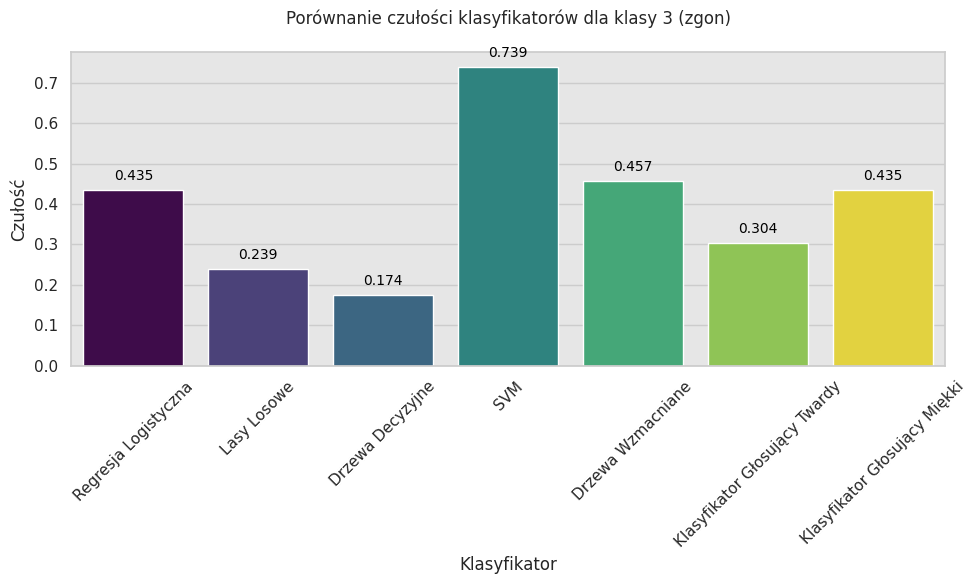

<ipython-input-22-57e55a3d9f55>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f1_plot = sns.barplot(x="Classifier", y="F1_Class_3", data=results_df, palette=colors)


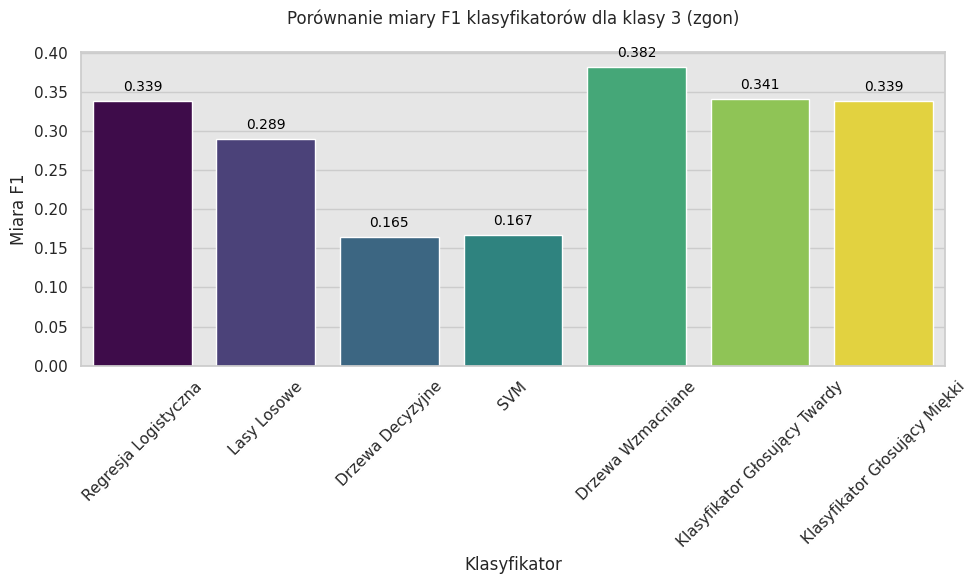

In [ ]:
# Ustawienie stylu wykresów
sns.set(style="whitegrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})

# Wykres Recall dla klasy 3 (zgon) dla wszystkich klasyfikatorów
plt.figure(figsize=(10, 6))
recall_plot = sns.barplot(x="Classifier", y="Recall_Class_3", data=results_df, palette=colors)
recall_plot.set_title('Porównanie czułości klasyfikatorów dla klasy 3 (zgon)', pad=20)
recall_plot.set_xlabel('Klasyfikator')
recall_plot.set_ylabel('Czułość')
for p in recall_plot.patches:
    recall_plot.annotate(format_float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                         textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres F1-Score dla klasy 3 (zgon) dla wszystkich klasyfikatorów
plt.figure(figsize=(10, 6))
f1_plot = sns.barplot(x="Classifier", y="F1_Class_3", data=results_df, palette=colors)
f1_plot.set_title('Porównanie miary F1 klasyfikatorów dla klasy 3 (zgon)', pad=20)
f1_plot.set_xlabel('Klasyfikator')
f1_plot.set_ylabel('Miara F1')
for p in f1_plot.patches:
    f1_plot.annotate(format_float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                     textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## TOPSIS



TOPSIS (Technique for Order Preference by Similarity to Ideal Solution): Metoda ta identyfikuje najlepsze rozwiązanie, porównując każdą opcję do idealnej (najlepszej) i negatywnej-idealnej (najgorszej) solucji w kontekście wszystkich kryteriów.

In [ ]:
import numpy as np
import pandas as pd


df_top = results_df.drop(columns=['Classifier'])

# Normalizacja
normalized_df_top = df_top / np.sqrt((df_top**2).sum())

# Wagi kryteriów
weights_top = np.array([1.5, 1.5, 1.5,1, 1, 2, 1.5, 1.5,1.5, 2,1.5, 1.5,1.5,1.5])

# Wagi znormalizowane
weighted_df_top = normalized_df_top * weights_top

# Idealne i negatywnie-idealne rozwiązania
ideal_solution = weighted_df_top.max()
negative_ideal_solution = weighted_df_top.min()

# Odległość od idealnej i negatywnej-idealnej solucji
distance_from_ideal = np.sqrt(((weighted_df_top - ideal_solution)**2).sum(axis=1))
distance_from_negative_ideal = np.sqrt(((weighted_df_top - negative_ideal_solution)**2).sum(axis=1))

# Wynik TOPSIS
topsis_score = distance_from_negative_ideal / (distance_from_ideal + distance_from_negative_ideal)

# Dodanie wyniku TOPSIS do DataFrame
df_top['TOPSIS Score'] = topsis_score
df_top['Classifier'] = results_df['Classifier']

# Sortowanie DataFrame według kolumny 'TOPSIS Score' w sposób malejący
df_sorted_top = df_top.sort_values(by='TOPSIS Score', ascending=False)

# Wyświetlenie posortowanego DataFrame
print(df_sorted_top)


   Accuracy       AUC  Recall_Class_0  Recall_Class_1  Recall_Class_2  \
4  0.671882  0.873372        0.801802        0.534794        0.705815   
6  0.675264  0.879210        0.806306        0.539948        0.708096   
0  0.657082  0.858056        0.770270        0.512887        0.710376   
5  0.675264       NaN        0.857357        0.542526        0.673888   
1  0.686681  0.875112        0.843844        0.541237        0.719498   
3  0.423679  0.705774        0.165165        0.423969        0.603193   
2  0.580550  0.671377        0.704204        0.490979        0.587229   

   Recall_Class_3  F1_Class_0  F1_Class_1  F1_Class_2  F1_Class_3  \
4        0.456522    0.759602    0.566166    0.708238    0.381818   
6        0.434783    0.768240    0.572014    0.710120    0.338983   
0        0.434783    0.743478    0.552011    0.696089    0.338983   
5        0.304348    0.773189    0.570847    0.696934    0.341463   
1        0.239130    0.787115    0.577717    0.712190    0.289474   
3

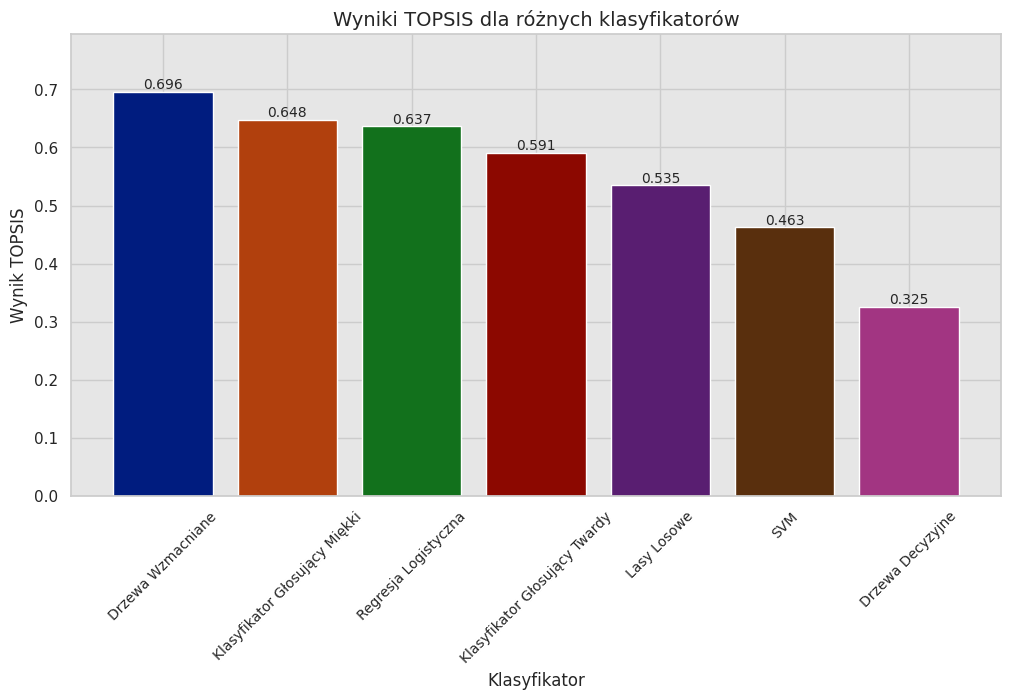

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dane TOPSIS
classifiers = [
    "Drzewa Wzmacniane",
    "Klasyfikator Głosujący Miękki",
    "Regresja Logistyczna",
    "Klasyfikator Głosujący Twardy",
    "Lasy Losowe",
    "SVM",
    "Drzewa Decyzyjne"
]
scores = [0.695754, 0.647579, 0.636625, 0.590569, 0.534653, 0.462898, 0.325301]

# Kolory dla słupków
colors = sns.color_palette("dark", len(classifiers))

plt.figure(figsize=(12, 6))
bars = plt.bar(classifiers, scores, color=colors)

# Dodanie wartości na słupkach
for bar, score in zip(bars, scores):
    yval = round(score, 3)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), yval, ha='center', va='bottom', fontsize=10)

# Konfiguracja wykresu
plt.xlabel('Klasyfikator', fontsize=12)
plt.ylabel('Wynik TOPSIS', fontsize=12)
plt.title('Wyniki TOPSIS dla różnych klasyfikatorów', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, max(scores) + 0.1)

plt.show()


## Krzywe ROC

Wykresy ROC dla Regresja Logistyczna:


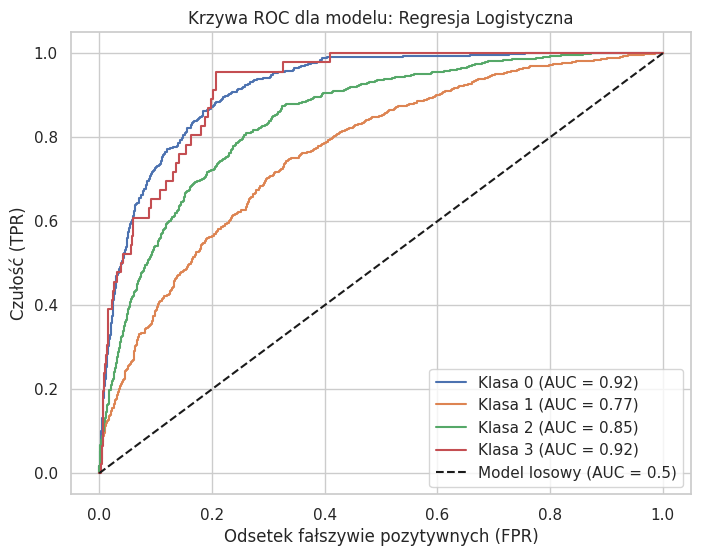

##################################################

Wykresy ROC dla Lasy Losowe:


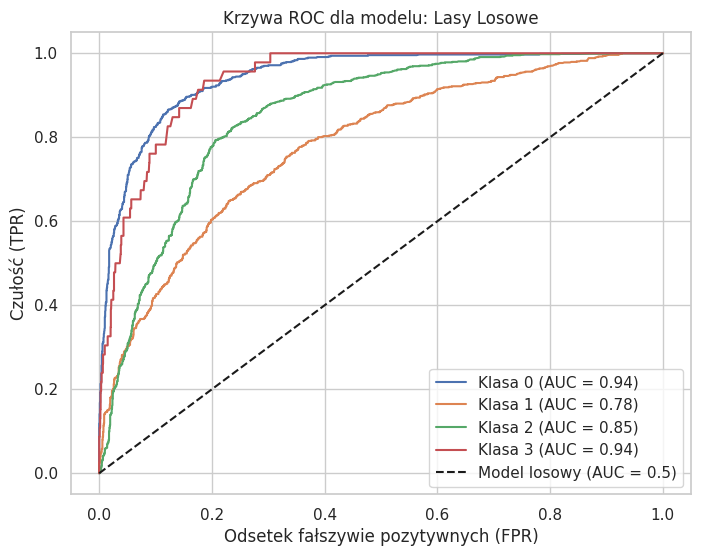

##################################################

Wykresy ROC dla Drzewa Decyzyjne:


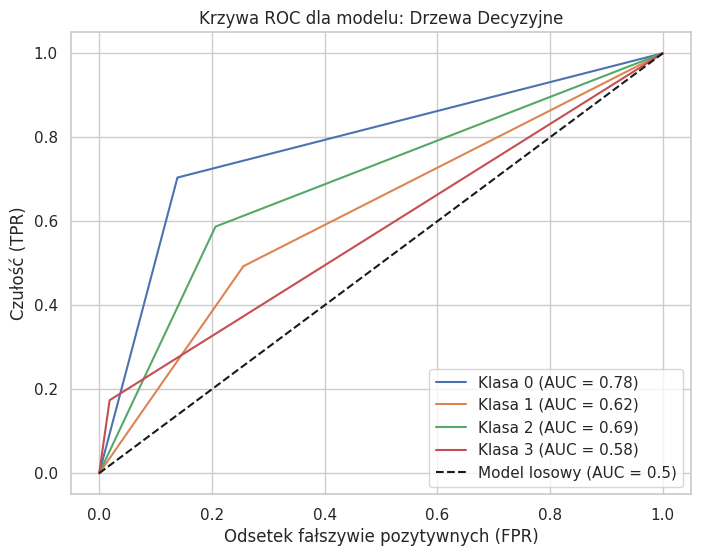

##################################################

Wykresy ROC dla SVM:


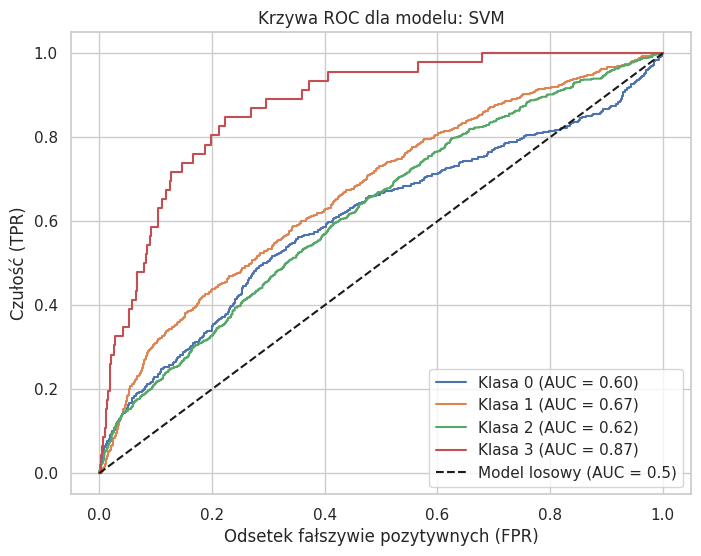

##################################################

Wykresy ROC dla Drzewa Wzmacniane:


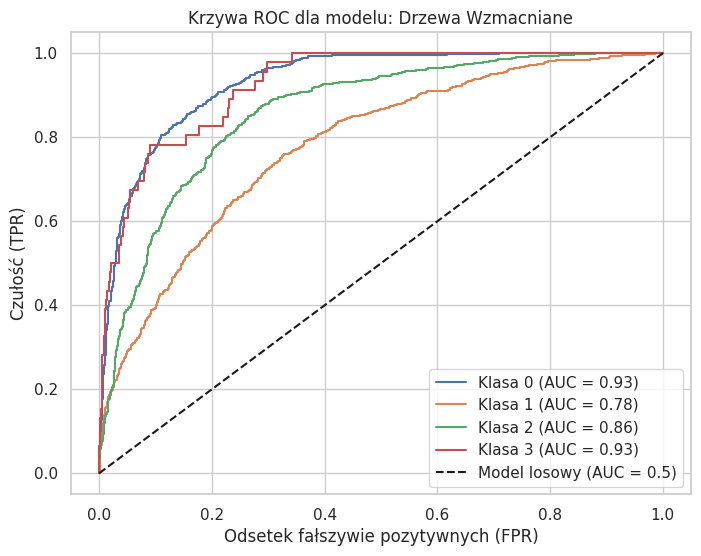

##################################################

Wykresy ROC dla Klasyfikator Głosujący Twardy:
  Typ głosowania: Twarde
Model nie posiada metody predict_proba, brak krzywej ROC.

##################################################

Wykresy ROC dla Klasyfikator Głosujący Miękki:
  Typ głosowania: Miękkie


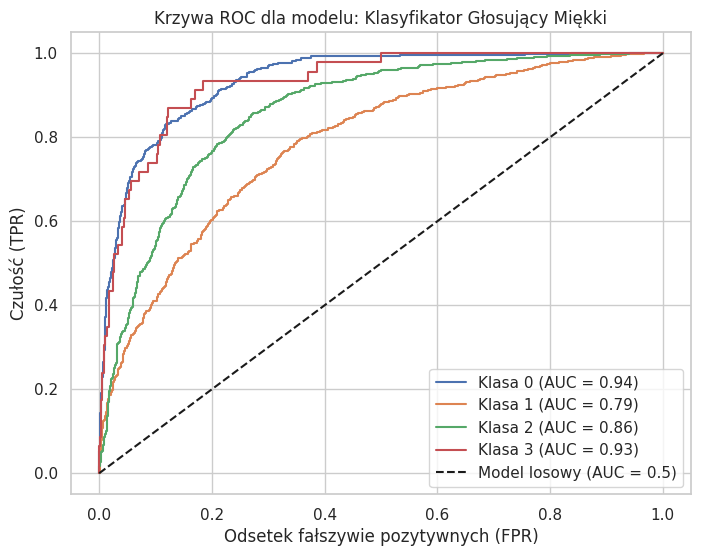

##################################################



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

class_labels = np.sort(df['NACA_4'].unique())


for name, clf in classifiers.items():
    y_pred = clf.predict(X_selected_test)
    y_proba = clf.predict_proba(X_selected_test) if hasattr(clf, "predict_proba") else None
    print(f"Wykresy ROC dla {name}:")  # Zmienione na name zamiast clf.__class__.__name__

    if isinstance(clf, VotingClassifier):
        print(f"  Typ głosowania: {'Miękkie' if clf.voting == 'soft' else 'Twarde'}")

    if y_proba is not None:
        # Rysowanie krzywej ROC dla każdej klasy
        plt.figure(figsize=(8, 6))  # Można dostosować rozmiar figury

        for (idx, class_label) in enumerate(class_labels):
            y_test_bin = (y_test == class_label).astype(int)
            y_proba_bin = y_proba[:, idx]

            fpr, tpr, _ = roc_curve(y_test_bin, y_proba_bin)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, linestyle='-', label=f'Klasa {class_label} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Model losowy (AUC = 0.5)')
        plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
        plt.ylabel('Czułość (TPR)')
        plt.title(f'Krzywa ROC dla modelu: {name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    else:
        print("Model nie posiada metody predict_proba, brak krzywej ROC.\n")

    print("#" * 50 + "\n")


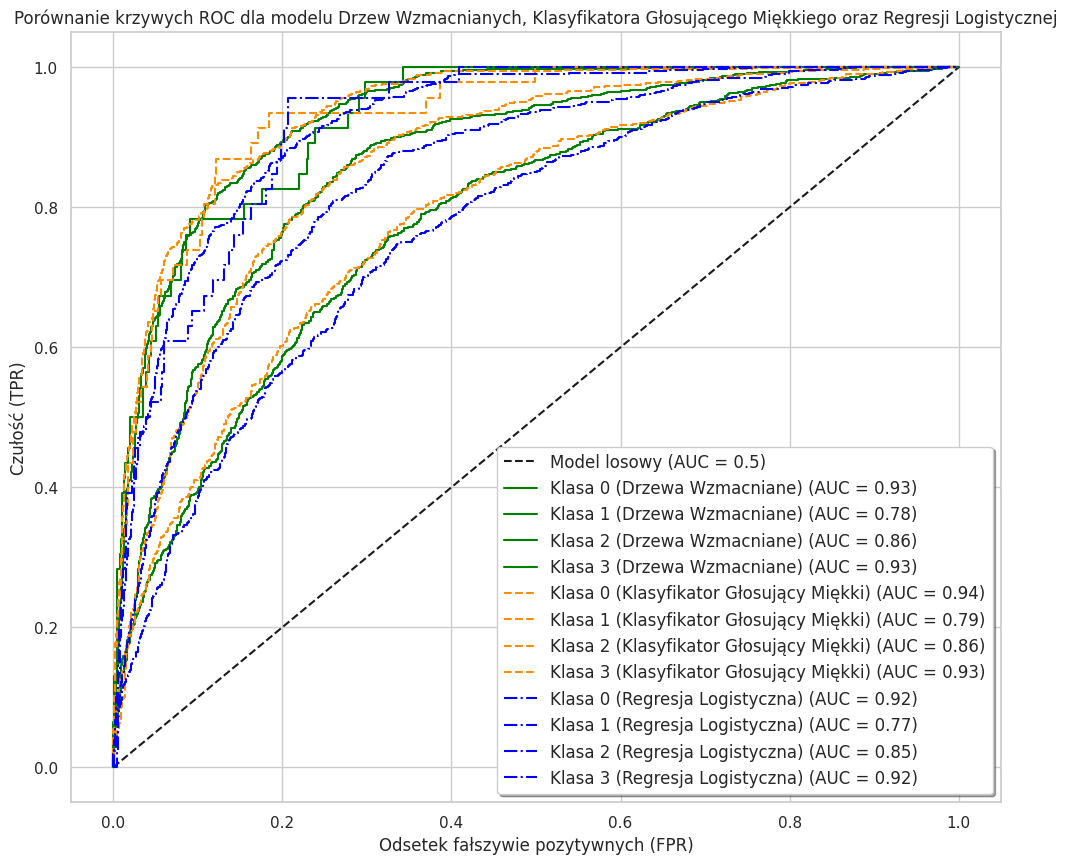

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Lista unikalnych etykiet klas
class_labels = np.sort(df['NACA_4'].unique())

# Wybrane modele do porównania
selected_classifiers = {
    "Drzewa Wzmacniane": classifiers["Drzewa Wzmacniane"],
    "Klasyfikator Głosujący Miękki": classifiers["Klasyfikator Głosujący Miękki"],
    "Regresja Logistyczna": classifiers["Regresja Logistyczna"]
}

# Ustawienie kolorów i stylów linii dla różnych modeli
colors = cycle(['green', 'darkorange', 'blue'])
linestyles = cycle(['-', '--', '-.'])

plt.figure(figsize=(12, 10))

# Linia oznaczająca model losowy
plt.plot([0, 1], [0, 1], 'k--', label='Model losowy (AUC = 0.5)')

# Generowanie i rysowanie krzywych ROC dla każdego wybranego modelu
for (name, clf), color, linestyle in zip(selected_classifiers.items(), colors, linestyles):
    if hasattr(clf, "predict_proba"):
        # Prognozowanie prawdopodobieństw
        y_proba = clf.predict_proba(X_selected_test)

        # Obliczanie krzywych ROC i AUC dla każdej klasy
        for i in range(len(class_labels)):
            fpr, tpr, thresholds = roc_curve(y_test == class_labels[i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, linestyle=linestyle,
                     label=f'Klasa {class_labels[i]} ({name}) (AUC = {roc_auc:.2f})')

plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Czułość (TPR)')
plt.title('Porównanie krzywych ROC dla modelu Drzew Wzmacnianych, Klasyfikatora Głosującego Miękkiego oraz Regresji Logistycznej')
plt.legend(loc="lower right", fontsize='medium', ncol=1, frameon=True, shadow=True, fancybox=True)
plt.grid(True)
plt.show()


### analiza zmiennych

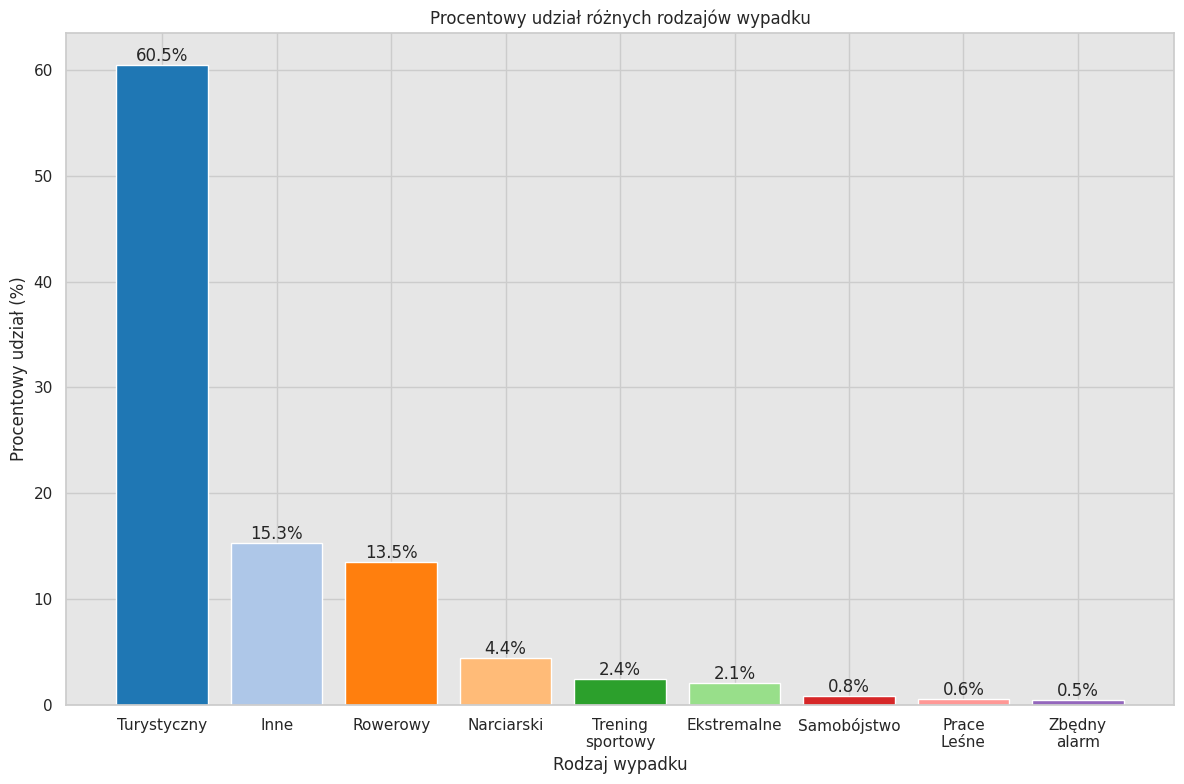

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Rodzaj wypadku': [
        'Turystyczny', 'Inne', 'Rowerowy', 'Narciarski', 'Trening sportowy',
        'Ekstremalne', 'Samobójstwo', 'Prace Leśne', 'Zbędny alarm'
    ],
    'Procentowy udział (%)': [60.5, 15.3, 13.5, 4.4, 2.4, 2.1, 0.8, 0.6, 0.5]
}

# Funkcja dzieląca dwuczłonowe nazwy na dwa wiersze
def split_two_words(name):
    if ' ' in name:
        return name.replace(' ', '\n', 1)
    return name

# Zastosowanie funkcji do podziału nazw
data['Rodzaj wypadku'] = [split_two_words(name) for name in data['Rodzaj wypadku']]

# Załadowanie danych do DataFrame
df = pd.DataFrame(data)

# Tworzenie wykresu słupkowego z procentami
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Rodzaj wypadku'], df['Procentowy udział (%)'], color=plt.cm.tab20.colors[:len(df)])

# Dodawanie wartości procentowych nad słupkami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

# Ustawienia osi i tytułu
plt.xlabel('Rodzaj wypadku')
plt.ylabel('Procentowy udział (%)')
plt.title('Procentowy udział różnych rodzajów wypadku')

# Przesunięcie etykiet w prawo
ax = plt.gca()
labels = ax.get_xticklabels()
for label in labels:
    label.set_x(label.get_position()[0] + 0.1)

plt.xticks(rotation=0, ha='center')
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

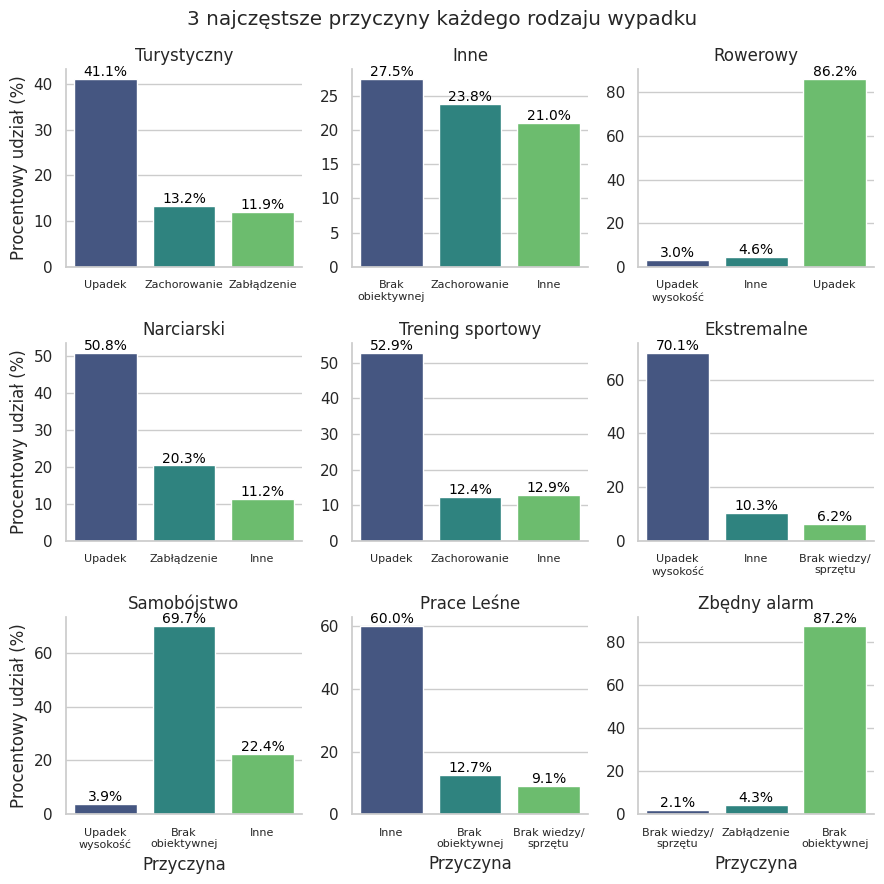

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fake_data = {
    'Rodzaj_wypadku': [
        'Turystyczny', 'Turystyczny', 'Turystyczny',
        'Inne', 'Inne', 'Inne',
        'Narciarski', 'Narciarski', 'Narciarski',
        'Zbędny alarm', 'Zbędny alarm', 'Zbędny alarm',
        'Samobójstwo', 'Samobójstwo', 'Samobójstwo',
        'Ekstremalne', 'Ekstremalne', 'Ekstremalne',
        'Rowerowy', 'Rowerowy', 'Rowerowy',
        'Prace Leśne', 'Prace Leśne', 'Prace Leśne',
        'Trening sportowy', 'Trening sportowy', 'Trening sportowy'
    ],
    'Przyczyna': [
        'Upadek', 'Zachorowanie', 'Zabłądzenie',
        'Brak obiektywnej', 'Zachorowanie', 'Inne',
        'Upadek', 'Zabłądzenie', 'Inne',
        'Brak obiektywnej', 'Zabłądzenie', 'Brak wiedzy/sprzętu',
        'Brak obiektywnej', 'Inne', 'Upadek wysokość',
        'Upadek wysokość', 'Inne', 'Brak wiedzy/sprzętu',
        'Upadek', 'Inne', 'Upadek wysokość',
        'Inne', 'Brak obiektywnej', 'Brak wiedzy/sprzętu',
        'Upadek', 'Inne', 'Zachorowanie'
    ],
    'Procentowy_udzial': [
        41.1, 13.2, 11.9,
        27.5, 23.8, 21.0,
        50.8, 20.3, 11.2,
        87.2, 4.3, 2.1,
        69.7, 22.4, 3.9,
        70.1, 10.3, 6.2,
        86.2, 4.6, 3.0,
        60.0, 12.7, 9.1,
        52.9, 12.9, 12.4
    ]
}

# Data o ogólnej liczebności rodzajów wypadków
overall_data = {
    'Rodzaj_wypadku': [
        'Turystyczny', 'Inne', 'Rowerowy', 'Narciarski', 'Trening sportowy',
        'Ekstremalne', 'Samobójstwo', 'Prace Leśne', 'Zbędny alarm'
    ],
    'Procentowy_udzial': [60.5, 15.3, 13.5, 4.4, 2.4, 2.1, 0.8, 0.6, 0.5]
}

# Stworzenie DataFrame
df_fake = pd.DataFrame(fake_data)
df_overall = pd.DataFrame(overall_data)

# Sortowanie df_fake zgodnie z kolejnością w df_overall
category_order = df_overall['Rodzaj_wypadku'].tolist()
df_fake['Rodzaj_wypadku'] = pd.Categorical(df_fake['Rodzaj_wypadku'], categories=category_order, ordered=True)
df_fake = df_fake.sort_values('Rodzaj_wypadku')

# Dzielenie dwuczłonowych nazw na dwa wiersze
df_fake['Przyczyna'] = df_fake['Przyczyna'].replace({
    'Brak obiektywnej': 'Brak\nobiektywnej',
    'Brak wiedzy/sprzętu': 'Brak wiedzy/\nsprzętu',
    'Upadek wysokość': 'Upadek\nwysokość'
})

# Ustawienie stylu wykresu
sns.set(style="whitegrid")

# Stworzenie siatki wykresów
g = sns.FacetGrid(df_fake, col="Rodzaj_wypadku", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="Przyczyna", y="Procentowy_udzial", palette="viridis")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Przyczyna", "Procentowy udział (%)")

# Dodanie wartości procentowych nad słupkami
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Zmniejszenie czcionki dla nazw przyczyn bez rotacji
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(8)

# Dodanie tytułu
plt.subplots_adjust(top=0.9)
g.fig.suptitle('3 najczęstsze przyczyny każdego rodzaju wypadku')

plt.tight_layout()
plt.show()


In [ ]:
# Grupowanie danych
grouped = df.groupby(['Rodzaj_wypadku', 'NACA_4']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reset indeksów, aby uzyskać czystą tabelę
percentages = percentages.reset_index()

# Wypisanie tabeli
print(percentages)



NACA_4    Rodzaj_wypadku          0          1          2          3
0            Ekstremalne  36.597938  14.948454  46.391753   2.061856
1                   Inne  38.685121  26.089965  30.449827   4.775087
2             Narciarski  29.594272  28.639618  41.288783   0.477327
3            Prace_Lesne  10.909091   1.818182  65.454545  21.818182
4               Rowerowy   2.197802  34.379906  62.794349   0.627943
5            Samobojstwo  47.368421   3.947368  10.526316  38.157895
6       Trening_sportowy  18.222222  67.111111  14.222222   0.444444
7            Turystyczny  30.595841  34.702079  33.671151   1.030928
8           Zbedny_alarm  97.872340   0.000000   2.127660   0.000000


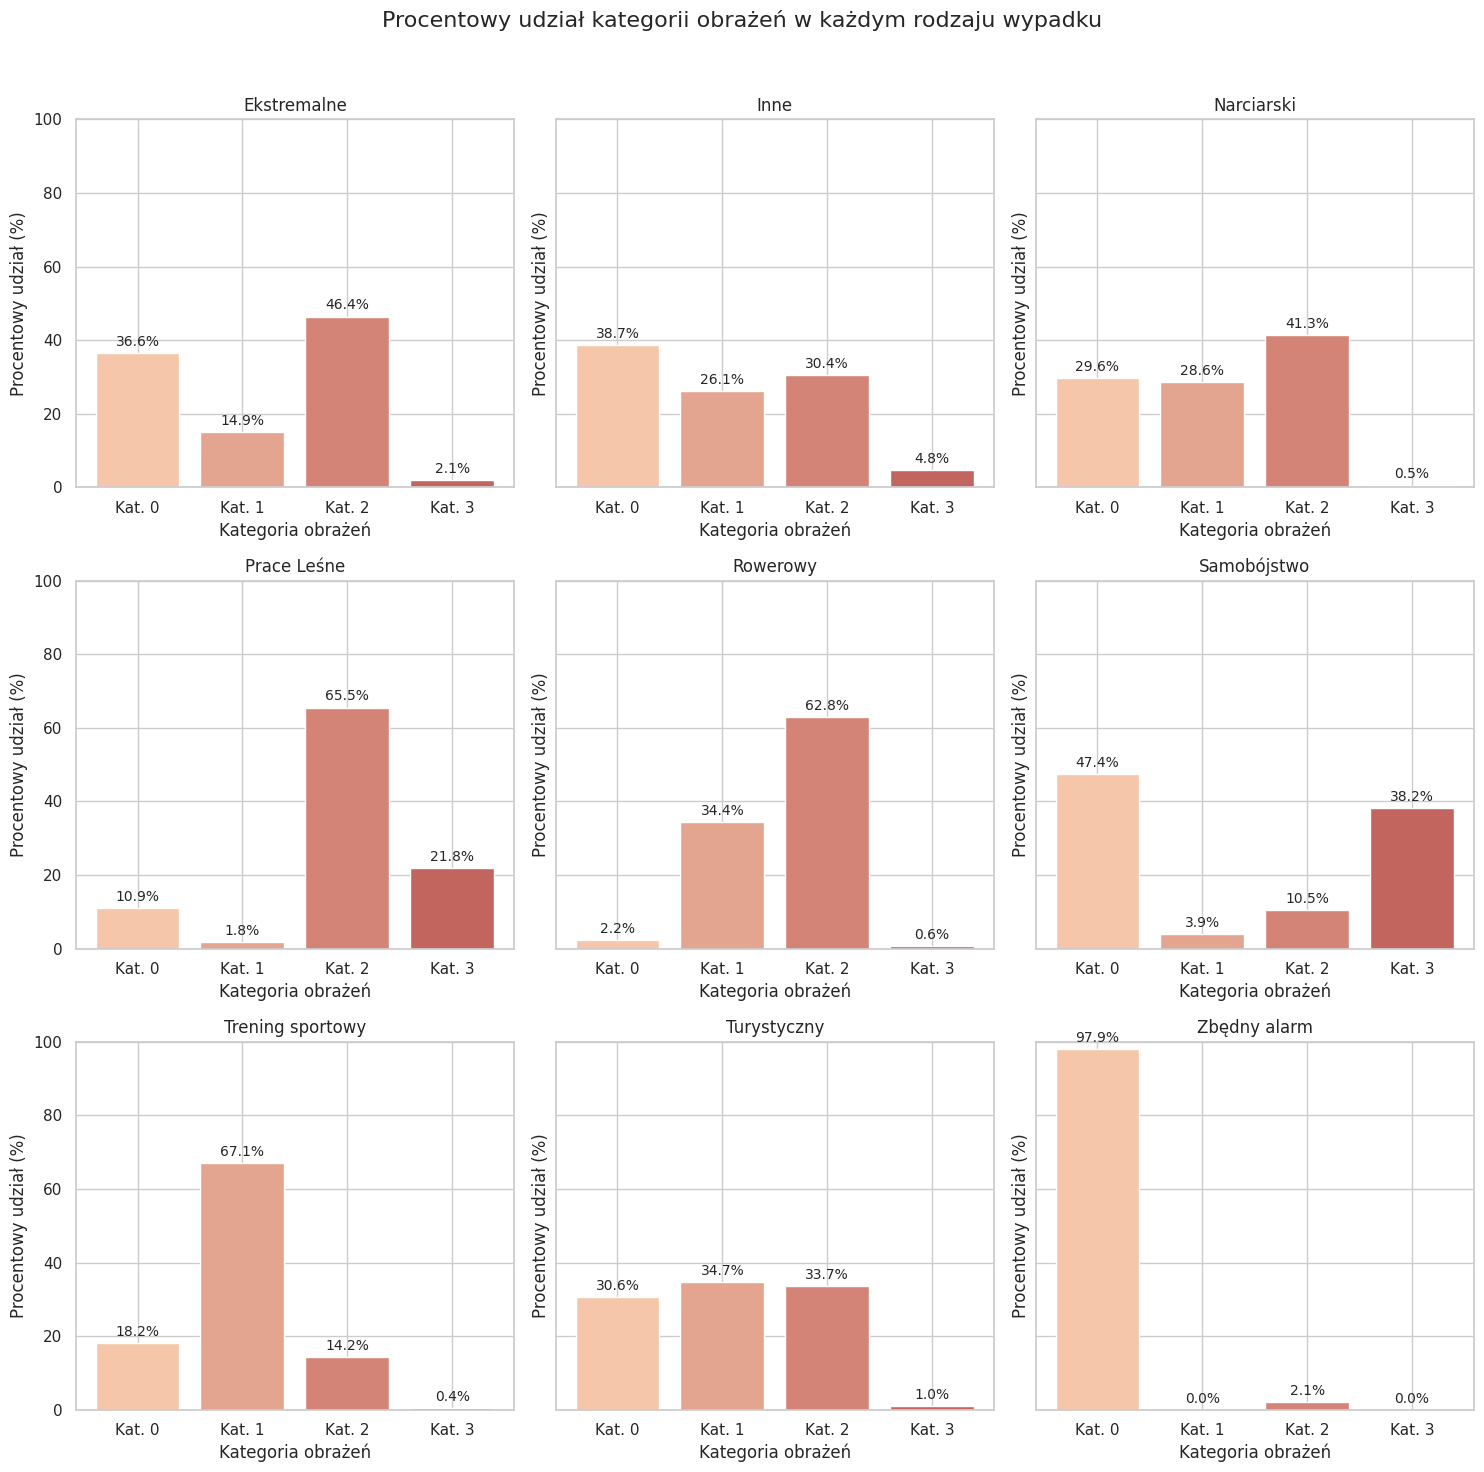

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane
data = {
    'Rodzaj wypadku': [
        'Ekstremalne', 'Inne', 'Narciarski', 'Prace Leśne', 'Rowerowy',
        'Samobójstwo', 'Trening sportowy', 'Turystyczny', 'Zbędny alarm'
    ],
    'Kategoria obrażeń 0': [36.597938, 38.685121, 29.594272, 10.909091, 2.197802, 47.368421, 18.222222, 30.595841, 97.872340],
    'Kategoria obrażeń 1': [14.948454, 26.089965, 28.639618, 1.818182, 34.379906, 3.947368, 67.111111, 34.702079, 0.000000],
    'Kategoria obrażeń 2': [46.391753, 30.449827, 41.288783, 65.454545, 62.794349, 10.526316, 14.222222, 33.671151, 2.127660],
    'Kategoria obrażeń 3': [2.061856, 4.775087, 0.477327, 21.818182, 0.627943, 38.157895, 0.444444, 1.030928, 0.000000]
}

# Tworzenie DataFrame
df = pd.DataFrame(data)

# Ustawienie indeksu na Rodzaj wypadku
df.set_index('Rodzaj wypadku', inplace=True)

# Kolory dla każdej kategorii
colors = ['#f5c6aa', '#e4a590', '#d38477', '#c2655f']

# Rysowanie wykresów
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Procentowy udział kategorii obrażeń w każdym rodzaju wypadku', fontsize=16)

# Tytuły dla kategorii
categories = ['Kat. 0', 'Kat. 1', 'Kat. 2', 'Kat. 3']

for i, ax in enumerate(axes.flatten()):
    rodzaj = df.index[i]
    values = df.loc[rodzaj]

    # Rysowanie słupków
    bars = ax.bar(categories, values, color=colors)

    # Dodawanie wartości procentowych nad słupkami
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

    ax.set_title(rodzaj)
    ax.set_ylim(0, 100)  # Ustalanie limitów osi Y od 0 do 100
    ax.set_xlabel('Kategoria obrażeń')
    ax.set_ylabel('Procentowy udział (%)')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Dopasowanie układu, z wyłączeniem miejsca na tytuł główny
plt.show()


In [ ]:
count_df = df.groupby(['Przyczyna', 'NACA_4']).size().unstack(fill_value=0)

# Obliczanie procentowego udziału dla każdej przyczyny
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Dodanie sumy przypadków dla każdej przyczyny do DataFrame
percent_df['Suma'] = count_df.sum(axis=1)

print(percent_df)

NACA_4                         0          1          2          3  Suma
Przyczyna                                                              
Brak_obiektywnej       72.196478  13.809082   9.175162   4.819277  1079
Brak_wiedzy/sprzetu    69.295775  24.788732   5.915493   0.000000   355
Inne                   33.619211  38.164666  23.499142   4.716981  1166
Lawina                 71.428571  14.285714   0.000000  14.285714     7
Niska_temp             50.143266  33.524355  15.472779   0.859599   349
Upadek                  0.897756  37.705736  61.321696   0.074813  4010
Upadek_wysokosc        12.698413  23.015873  59.920635   4.365079   252
Wysoka_temp            23.008850  57.522124  19.469027   0.000000   113
Zabladzenie            84.356895  12.050985   2.433372   1.158749   863
Zachorowanie           20.431034  42.931034  32.413793   4.224138  1160
ukoszenie/pogryzienie   5.769231  65.384615  28.846154   0.000000   104


<ipython-input-54-05678006d3d8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategoria obrażeń', y='Procentowy udział', data=df_plot, palette=colors, ax=axs[row, col])
<ipython-input-54-05678006d3d8>:32: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.barplot(x='Kategoria obrażeń', y='Procentowy udział', data=df_plot, palette=colors, ax=axs[row, col])
<ipython-input-54-05678006d3d8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategoria obrażeń', y='Procentowy udział', data=df_plot, palette=colors, ax=axs[row, col])
<ipython-input-54-05678006d3d8>:32: UserWarning: The palette list has more values (12) than needed (4), whi

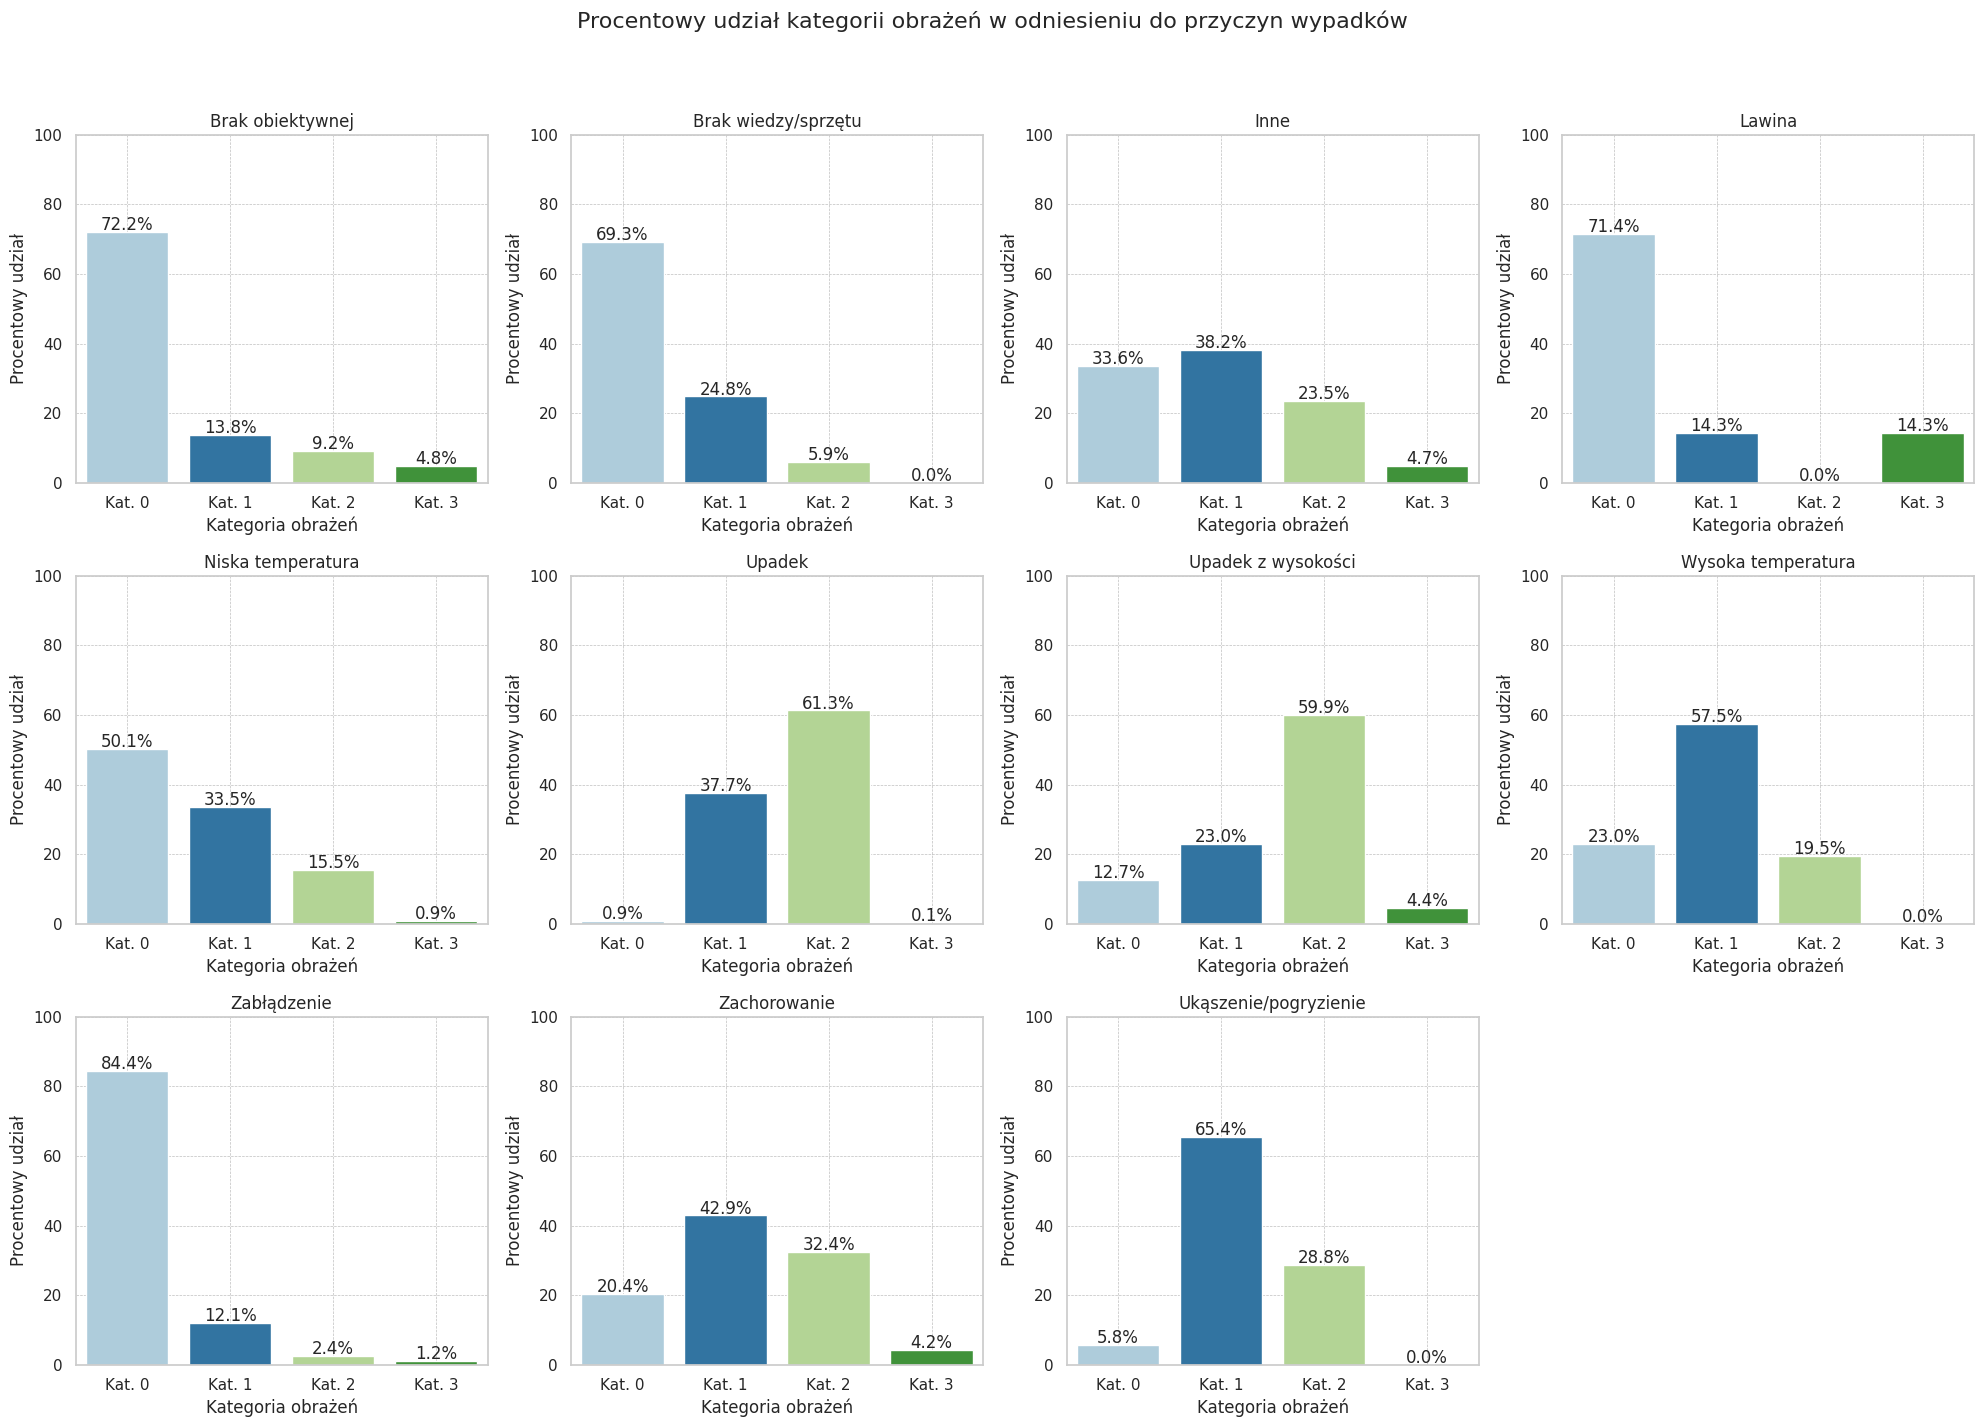

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dane
data = {
    'Przyczyna': [
        'Brak obiektywnej', 'Brak wiedzy/sprzętu', 'Inne', 'Lawina', 'Niska temperatura',
        'Upadek', 'Upadek z wysokości', 'Wysoka temperatura', 'Zabłądzenie', 'Zachorowanie',
        'Ukąszenie/pogryzienie'
    ],
    'Kat. 0': [72.2, 69.3, 33.6, 71.4, 50.1, 0.9, 12.7, 23.0, 84.4, 20.4, 5.8],
    'Kat. 1': [13.8, 24.8, 38.2, 14.3, 33.5, 37.7, 23.0, 57.5, 12.1, 42.9, 65.4],
    'Kat. 2': [9.2, 5.9, 23.5, 0.0, 15.5, 61.3, 59.9, 19.5, 2.4, 32.4, 28.8],
    'Kat. 3': [4.8, 0.0, 4.7, 14.3, 0.9, 0.1, 4.4, 0.0, 1.2, 4.2, 0.0]
}

df = pd.DataFrame(data)

# Tworzenie wykresów dla każdej przyczyny
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Procentowy udział kategorii obrażeń w odniesieniu do przyczyn wypadków', fontsize=16)

# Nowa paleta kolorów
colors = sns.color_palette("Paired")

for i, przyczyna in enumerate(df['Przyczyna']):
    row = i // 4
    col = i % 4
    df_plot = df[df['Przyczyna'] == przyczyna].melt(id_vars='Przyczyna', var_name='Kategoria obrażeń', value_name='Procentowy udział')

    sns.barplot(x='Kategoria obrażeń', y='Procentowy udział', data=df_plot, palette=colors, ax=axs[row, col])
    axs[row, col].set_title(przyczyna)
    axs[row, col].set_ylim(0, 100)
    axs[row, col].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Mniej widoczna siatka
    axs[row, col].set_axisbelow(True)  # Siatka za słupkami
    for p in axs[row, col].patches:
        height = p.get_height()
        axs[row, col].annotate(f'{height:.1f}%',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='center',
                               xytext=(0, 5),
                               textcoords='offset points')

# Usunięcie pustych wykresów, jeśli są
if len(df['Przyczyna']) < 12:
    for i in range(len(df['Przyczyna']), 12):
        fig.delaxes(axs[i // 4, i % 4])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
